 
 # EDA-Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from geopy.distance import great_circle
import scipy.stats as stats
import pylab
from scipy.stats import skew,kurtosis
from scipy.stats.mstats import winsorize
get_ipython().run_line_magic('matplotlib', 'inline')

# 1) Load the dataset


In [2]:
df=pd.read_csv(r'C:\Users\Balasubramanian\Desktop\work\Assignment-Python\nyc_taxi_trip_duration.csv')
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848
...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447


# 2) Getting info of data set

In [3]:
# showes number of rows and column
df.shape

(729322, 11)

In [4]:
# Here we have 729322 Rows and 11 Columns totaly in our Data set

In [5]:
# for seeing first 5 rows
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [6]:
# we get to know datatype of all the columns and count of data in each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [7]:
# Here we can find the basic statistics data of the database 
df.describe(include="all")

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,729322,729322.000000,729322,729322,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322,7.293220e+05
unique,729322,NaN,709359,709308,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id1080784,NaN,2016-02-24 12:04:42,2016-02-19 19:25:04,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,4,4,NaN,NaN,NaN,NaN,NaN,725282,NaN
mean,NaN,1.535403,NaN,NaN,1.662055,-73.973513,40.750919,-73.973422,40.751775,NaN,9.522291e+02
std,NaN,0.498745,NaN,NaN,1.312446,0.069754,0.033594,0.069588,0.036037,NaN,3.864626e+03
min,NaN,1.000000,NaN,NaN,0.000000,-121.933342,34.712234,-121.933304,32.181141,NaN,1.000000e+00
25%,NaN,1.000000,NaN,NaN,1.000000,-73.991859,40.737335,-73.991318,40.735931,NaN,3.970000e+02
50%,NaN,2.000000,NaN,NaN,1.000000,-73.981758,40.754070,-73.979759,40.754509,NaN,6.630000e+02
75%,NaN,2.000000,NaN,NaN,2.000000,-73.967361,40.768314,-73.963036,40.769741,NaN,1.075000e+03


- vendor id has min value of 1 and max value of 2
- passesnger count has a error as its min value is 0

In [8]:
# for seeing last five rows
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


# Independent variables
- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in --vehicle memory before sending to the vendor because the vehicle did not have a -connection to the server (Y=store and forward; N=not a store and forward trip)

# Dependent variable
- trip_duration - (target) duration of the trip in seconds

In [9]:
# we set the display format for floating-point numbers
pd.set_option("display.float_format", str)

In [10]:
# Here we try finding if any nan value exits or not
fena=[feat for feat in df.columns if df[feat].isnull().sum()>1]
for feat in fena:
    print(feat.np.round(df[feat].isnull().mean(),4),"%missing percentage")

In [11]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [12]:
df.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

# Observation
- We Have no Nan or null value present in out data set
- there are 7293222 unique id
- there are 2 unique vendor ids
-  there are 9 unique passenger counts
- there are 2 unique vlaues for flag Y and N

# Feature creation
- creating date,time, day, month features

In [13]:
#converting varaibles into Date and time datatype 
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])
df["pickup_datetime"]

0        2016-02-29 16:40:21
1        2016-03-11 23:35:37
2        2016-02-21 17:59:33
3        2016-01-05 09:44:31
4        2016-02-17 06:42:23
                 ...        
729317   2016-05-21 13:29:38
729318   2016-02-22 00:43:11
729319   2016-04-15 18:56:48
729320   2016-06-19 09:50:47
729321   2016-01-01 17:24:16
Name: pickup_datetime, Length: 729322, dtype: datetime64[ns]

In [14]:
# Creating day column(sun,monday,tuesday,.....)
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [15]:
# Creating pick upand drop day number(monday=0,tuesday=1,......sunday=6)
df['pickup_day_no']=df['pickup_datetime'].dt.weekday
df['dropoff_day_no']=df['dropoff_datetime'].dt.weekday

In [16]:
# Creating pick up and drop hour(1-12 and 13,23)
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['dropoff_hour']=df['dropoff_datetime'].dt.hour


In [17]:
# Creating pickup and drop month(jan,feb,mar,apr....)
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

In [18]:
#dividing day into different time slots(6-12=morning,12-16=afternoon,16,22=evening,23-6=late night)
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [19]:
# Adding column for time of days
df['pickup_timeofday']=df['pickup_hour'].apply(time_of_day)
df['dropoff_timeofday']=df['dropoff_hour'].apply(time_of_day)

In [20]:
# Extracting distance from longitute and latitute
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
    start_coordinates=(pickup_lat,pickup_long)
    stop_coordinates=(dropoff_lat,dropoff_long)
    return great_circle(start_coordinates,stop_coordinates).km

In [21]:
df['distance'] = df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)
# df['distance'] = df['distance'].round(2)

In [22]:
df['average_speed'] = df['distance'] / (df['trip_duration'] / 3600)

In [23]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance,average_speed
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.95391845703125,40.77887344360352,-73.96387481689453,40.77116394042969,N,...,0,0,16,16,2,2,Evening,Evening,1.1990743076458716,10.791668768812846
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.98831176757811,40.73174285888672,-73.9947509765625,40.69493103027344,N,...,4,4,23,23,3,3,Late night,Late night,4.129116820813601,13.513473231753602
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314453125,40.721458435058594,-73.94802856445312,40.774917602539055,N,...,6,6,17,18,2,2,Evening,Evening,7.250763132438279,15.964983043900798
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961669921875,40.75971984863281,-73.95677947998048,40.780628204345696,N,...,1,1,9,10,1,1,Morning,Morning,2.361100698353076,7.449572755539942
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.01712036132812,40.70846939086913,-73.9881820678711,40.740631103515625,N,...,2,2,6,6,2,2,Morning,Morning,4.328540005092545,18.375877380109863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.9659194946289,40.78977966308594,-73.95263671875,40.78918075561523,N,...,5,5,13,13,5,5,Afternoon,Afternoon,1.1202245123789978,13.624352177582406
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.99666595458984,40.73743438720703,-74.0013198852539,40.731910705566406,N,...,0,0,0,0,2,2,Late night,Late night,0.7287056925696218,8.328065057938536
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.99784851074219,40.761695861816406,-74.00148773193358,40.741207122802734,N,...,4,4,18,19,4,4,Evening,Evening,2.2987787790922516,12.296587822781733
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.00670623779298,40.70824432373047,-74.0135498046875,40.71381378173828,N,...,6,6,9,9,6,6,Morning,Morning,0.8463169642324843,6.815975550865645


In [24]:
df.shape

(729322, 23)

### Observation
- we have added few extra feature (Total of 23 features)
- new columns have added in the dataset

# 3) Univariate Analysis
- Analysis of all individual variables

<Axes: xlabel='trip_duration', ylabel='Count'>

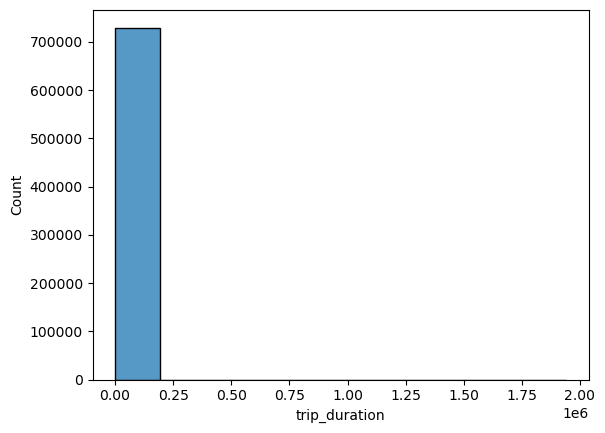

In [25]:
# Target varaibale(TRIP DURATION)
sns.histplot(df['trip_duration'],kde=False,bins=10)

- The graph is right skewed visibly

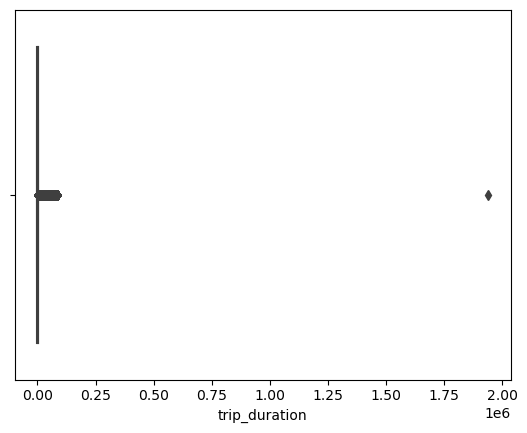

In [26]:
sns.boxplot(x="trip_duration", data=df)
plt.show()

- we can observe there is clear outlier

In [27]:
df['trip_duration'].sort_values(ascending=False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
672240          1
102646          1
533760          1
512833          1
622664          1
Name: trip_duration, Length: 729322, dtype: int64

- As there is only 1 outlier we can drop the row

In [28]:
df.drop(df[df['trip_duration'] == 1939736].index, inplace = True)

<Axes: xlabel='vendor_id', ylabel='count'>

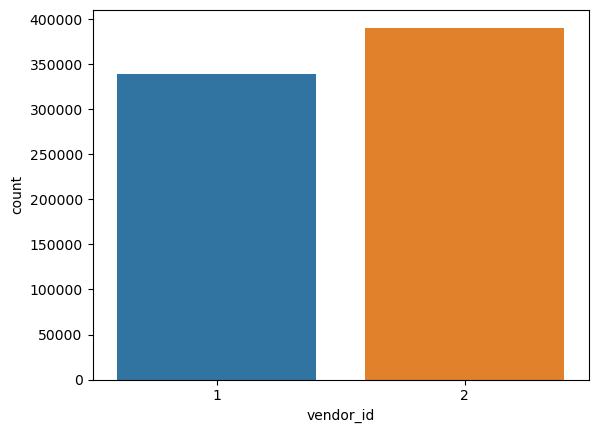

In [29]:
# Other variables(VENDOR ID)
sns.countplot(x="vendor_id",data=df)

- We can clearly see vendor-2 has taken more trips than vendor-1

In [30]:
# Other variables(PASSENGER COUNT)
df.passenger_count.value_counts()

passenger_count
1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: count, dtype: int64

- 33 trips with 0 passenger
- 1 trip with 7 and 9 passeanger each


<Axes: xlabel='passenger_count', ylabel='count'>

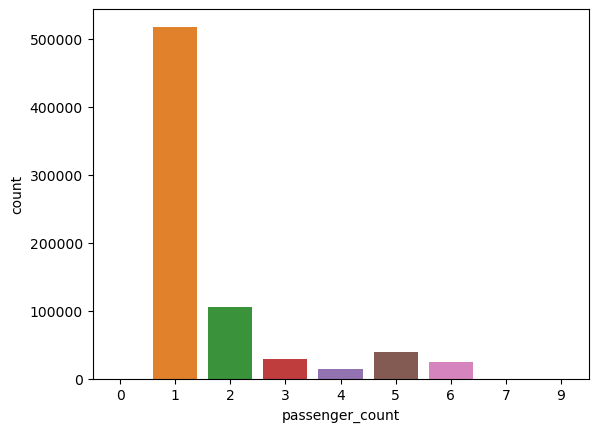

In [31]:
sns.countplot(x='passenger_count',data=df)

- higgest number of trips are with 1 passenger
- as the values of 0,7,9 passenger are less we can drop those rows for better analysis


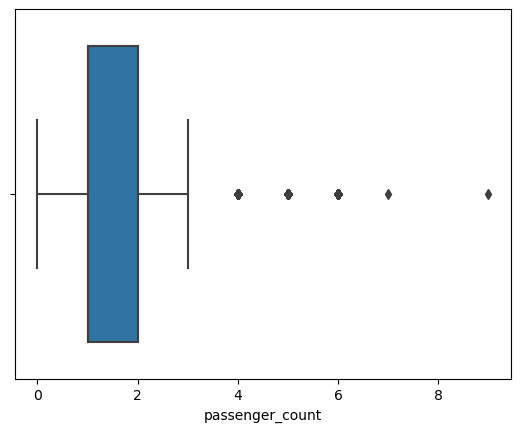

In [32]:
sns.boxplot(x='passenger_count', data=df)
plt.show()

In [33]:
df=df[df['passenger_count']!=0]
df=df[df['passenger_count']<=6]
df.passenger_count.value_counts()

passenger_count
1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
Name: count, dtype: int64

In [34]:
# Other variables(STORE AND FORWARD FLAGE)
df['store_and_fwd_flag'].value_counts()
df['store_and_fwd_flag'].value_counts(normalize=True)

store_and_fwd_flag
N      0.994463077585474
Y   0.005536922414525989
Name: proportion, dtype: float64

In [35]:
# Other variables(Distance)
df['distance'].value_counts()

distance
0.0                       2893
0.00042417558208441707      20
0.00042417558243807915      19
0.00042417558173075504      16
0.0012725267455459346       11
                          ... 
0.9776496630340497           1
0.925222579310665            1
4.112011559813826            1
1.1077894471317868           1
5.945845682445477            1
Name: count, Length: 726217, dtype: int64

- There are 2893 trips with 0 km 
The reason for 0 km distance
- The location was not be tracked
- Passenger canceled trip
- Driver made the trips delibretly


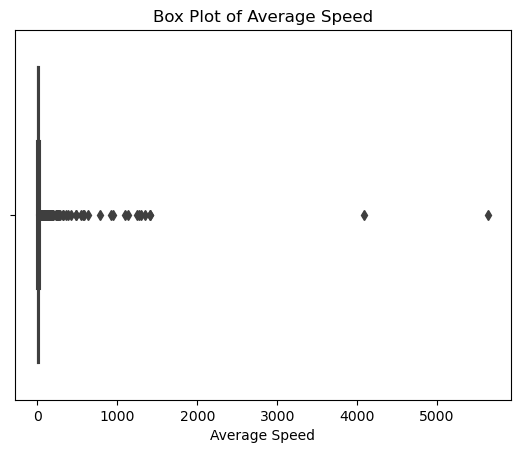

In [36]:
# Other variables(avg speed)
sns.boxplot(x=df['average_speed'])
plt.xlabel('Average Speed')
plt.title('Box Plot of Average Speed')
plt.show()

C:\Users\Balasubramanian\AppData\Local\Temp\ipykernel_2324\1361763891.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['average_speed'], shade=True)


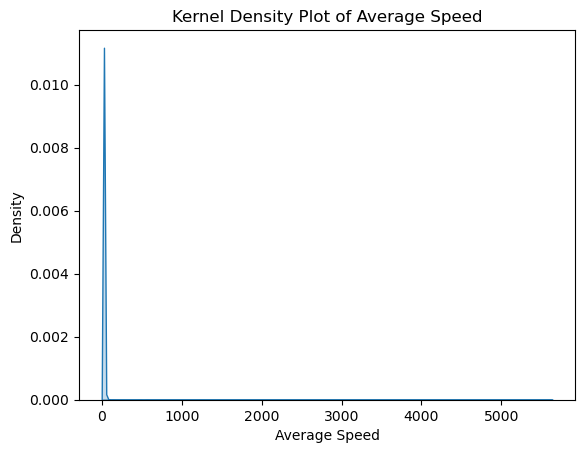

In [37]:
sns.kdeplot(df['average_speed'], shade=True)
plt.xlabel('Average Speed')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Average Speed')
plt.show()

- We can see that avg speed has a unstable kde and a lot of outiers

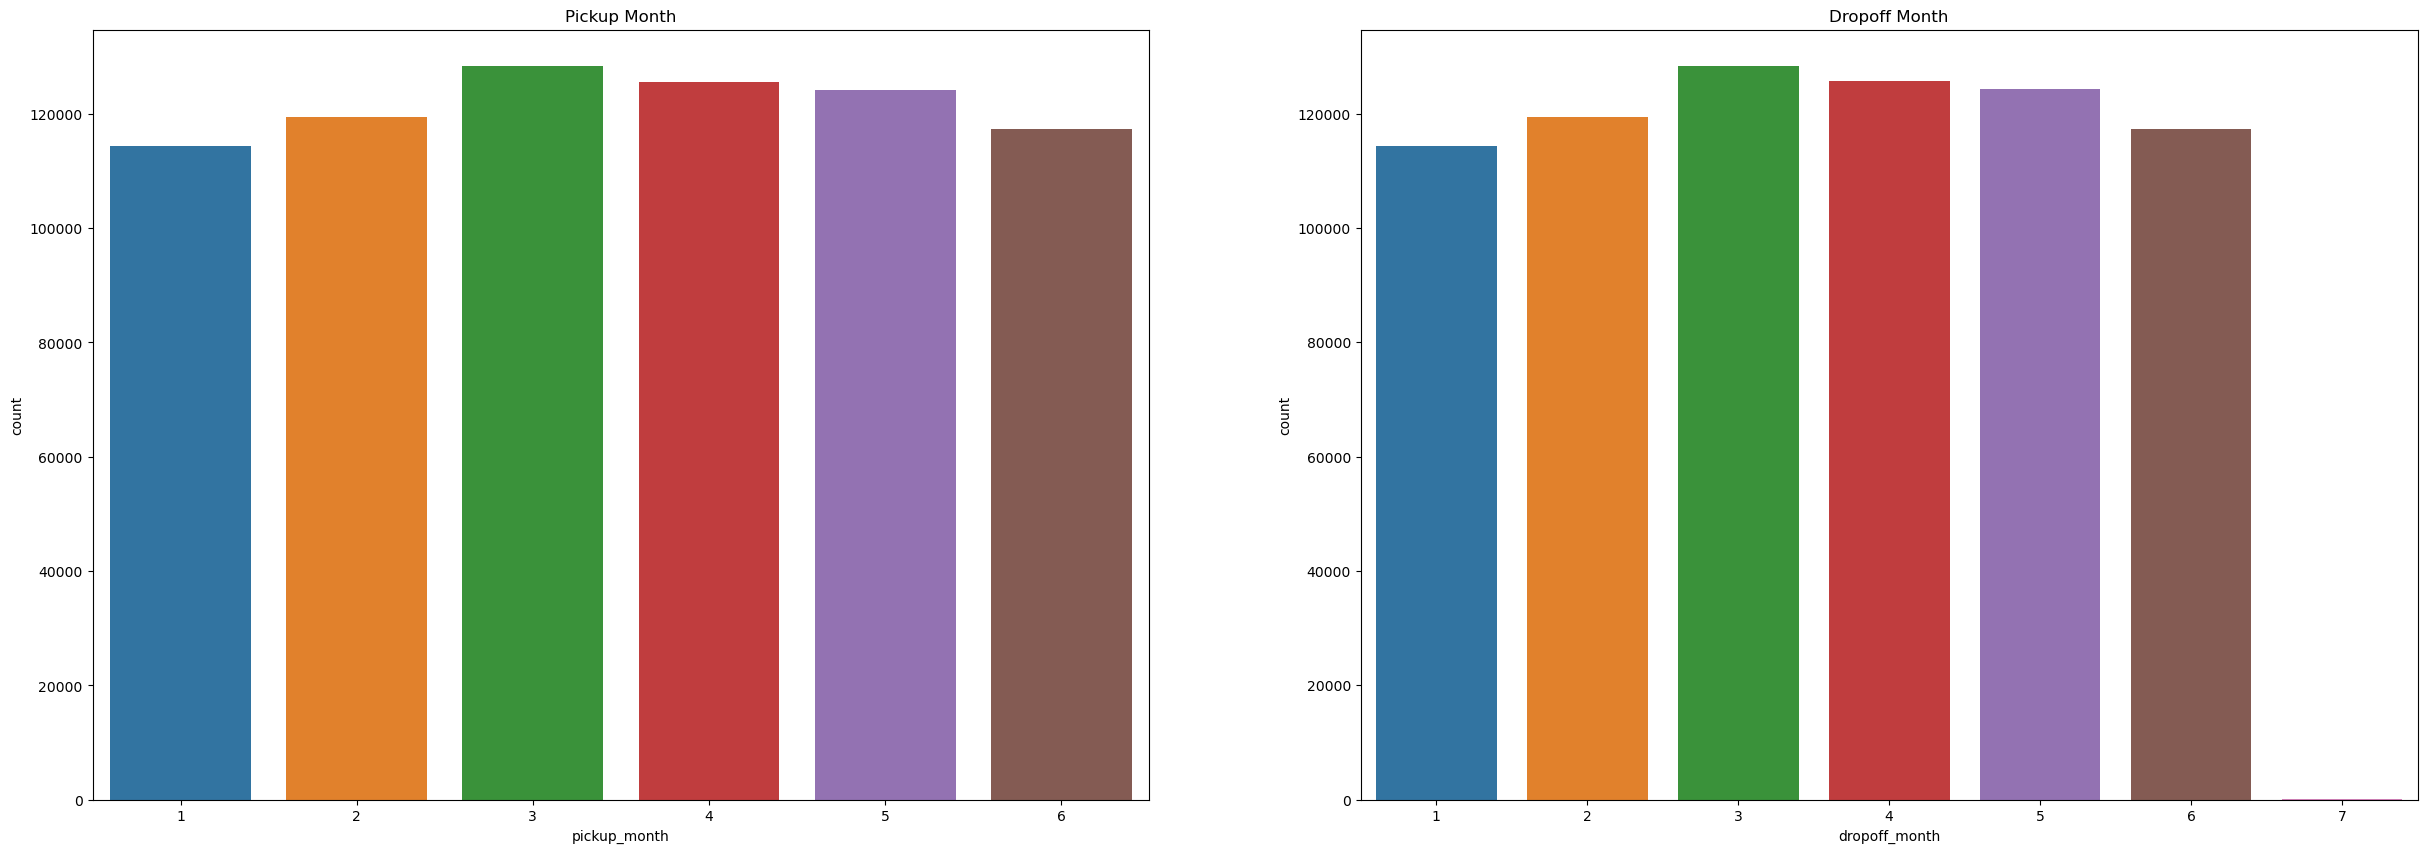

In [38]:
# trips per month(graph for trips done per month)
figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(30,10))
ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=df,ax=ax11)
ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=df,ax=ax12)

- We can say that every month there are almost equal number of trips completed
- Note: this also showes that drives have a target to achive 

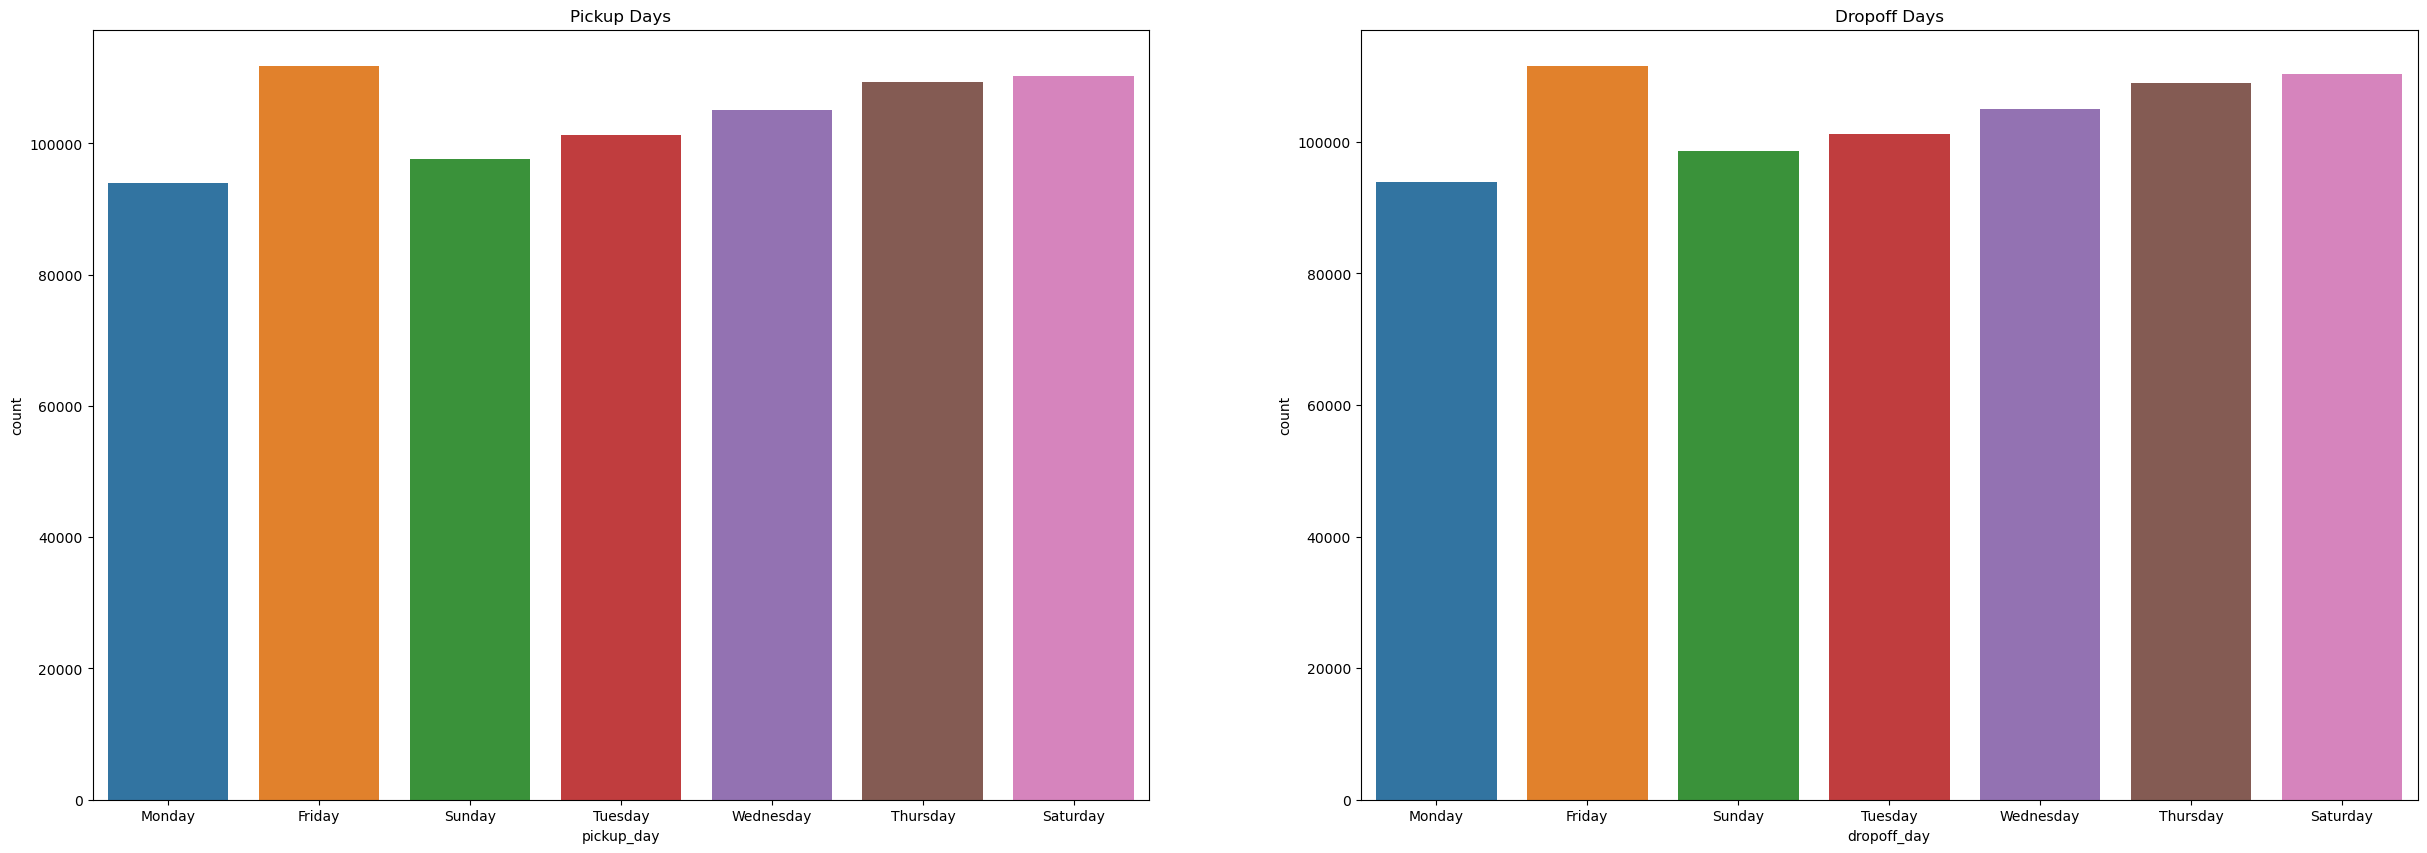

In [39]:
# Trips per day(graps for trips done each day of the week)
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(30,10))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=df,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=df,ax=ax2)

- We can clearly note that Friday has most number of trips in a week


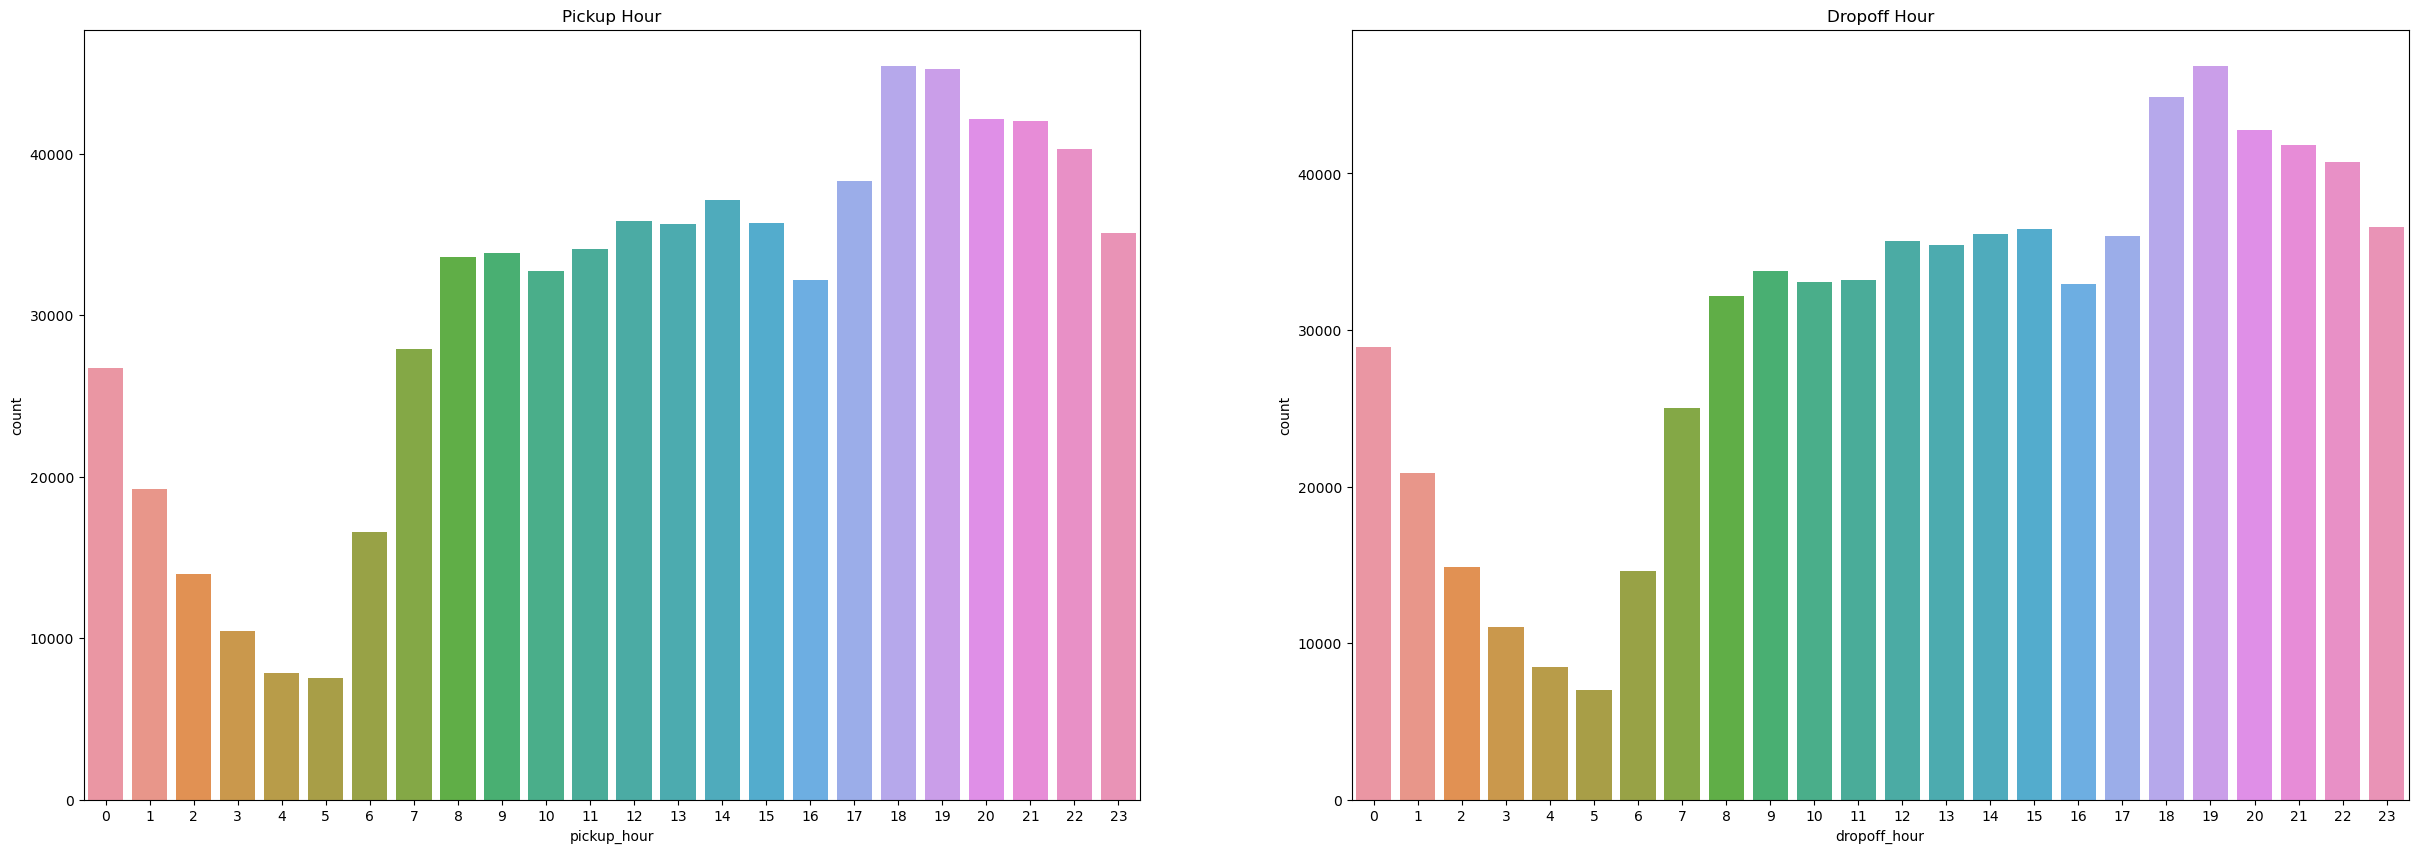

In [40]:
# Trips per hour(graph for trips done in each hour in a day)
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(30,10))
ax3.set_title('Pickup Hour')
ax=sns.countplot(x="pickup_hour",data=df,ax=ax3)
ax4.set_title('Dropoff Hour')
ax=sns.countplot(x="dropoff_hour",data=df,ax=ax4)

- The most number of pick up and drops are from 6:00 pm to 7:00

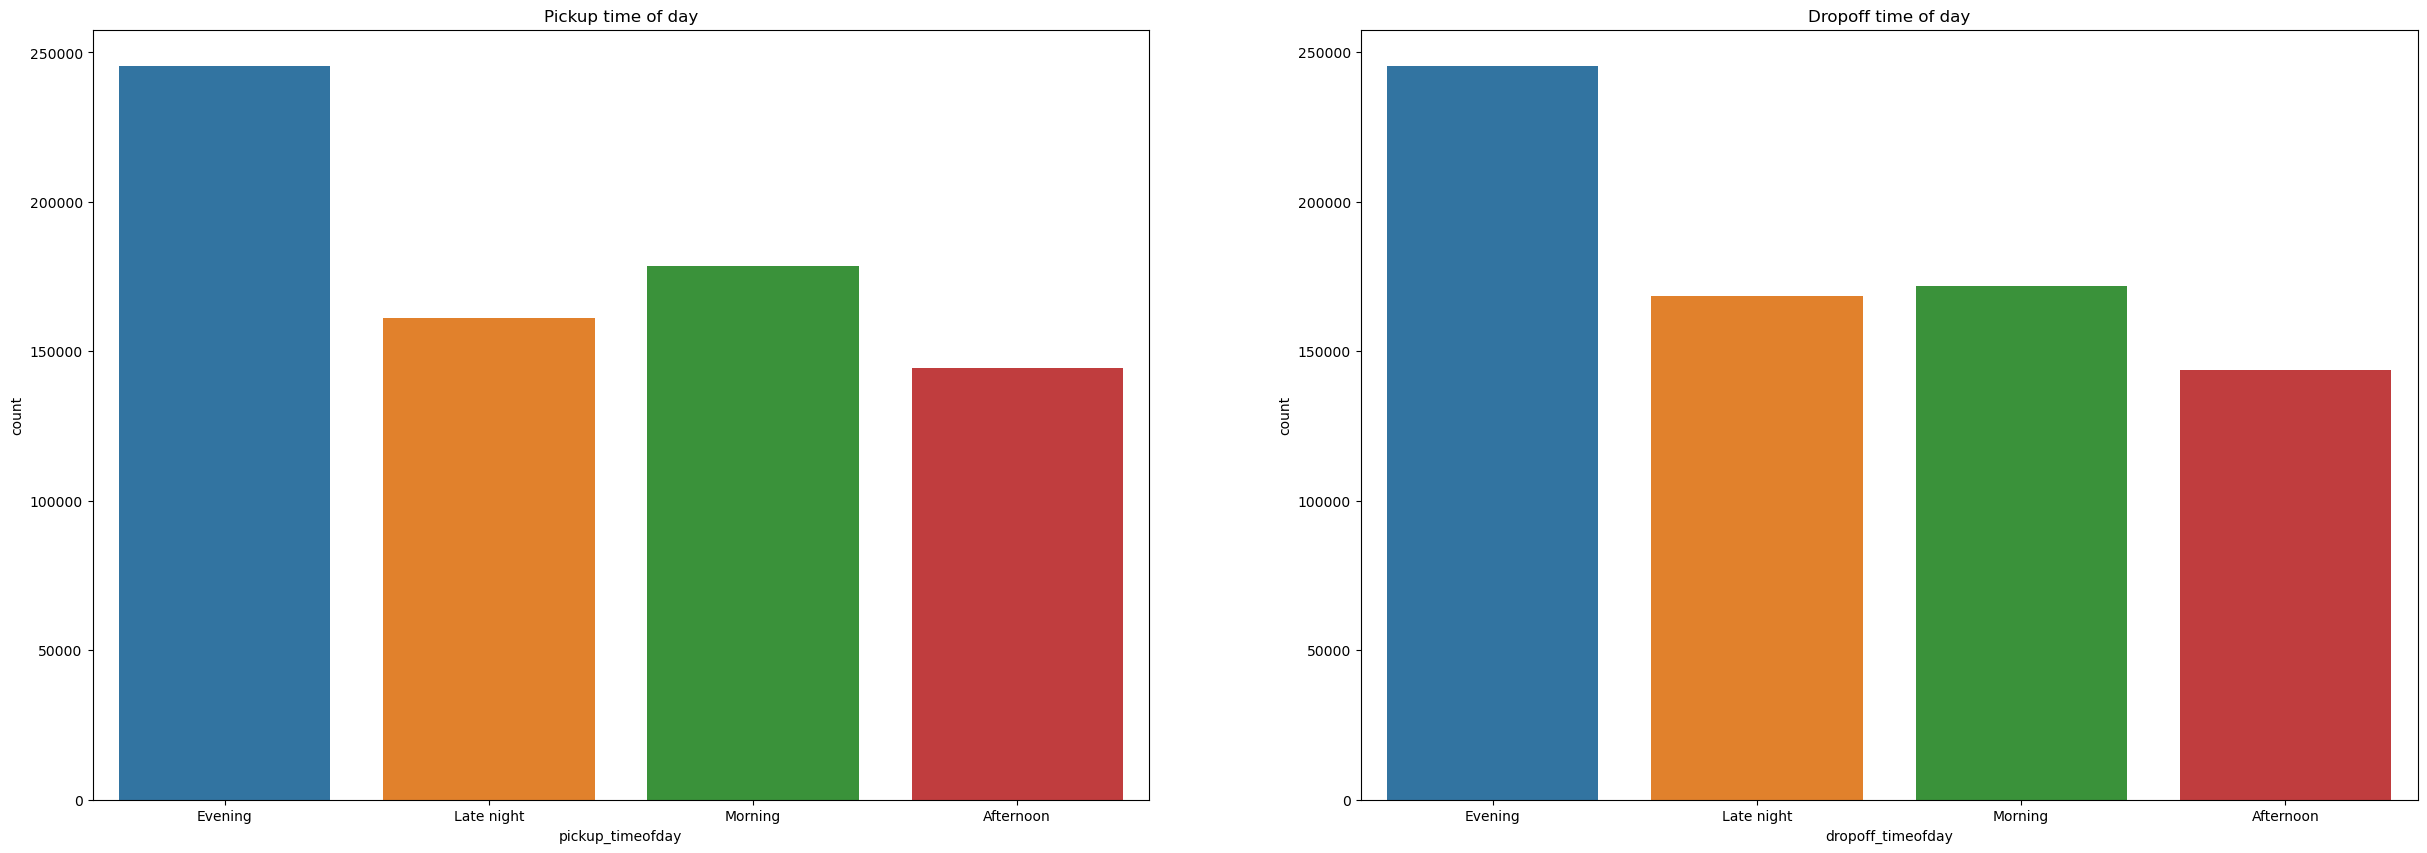

In [41]:
# Trips per time of the day(graph for trips done in time of day)
figure,(ax5,ax6)=plt.subplots(ncols=2,figsize=(30,10))
ax5.set_title('Pickup time of day')
ax=sns.countplot(x="pickup_timeofday",data=df,ax=ax5)
ax6.set_title('Dropoff time of day')
ax=sns.countplot(x="dropoff_timeofday",data=df,ax=ax6)

- We can note that vendors have most number of trips at evening

# Observation
- We did univariant analysis and got few Insights and Assumptions


In [42]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance,average_speed
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.95391845703125,40.77887344360352,-73.96387481689453,40.77116394042969,N,...,0,0,16,16,2,2,Evening,Evening,1.1990743076458716,10.791668768812846
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.98831176757811,40.73174285888672,-73.9947509765625,40.69493103027344,N,...,4,4,23,23,3,3,Late night,Late night,4.129116820813601,13.513473231753602
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314453125,40.721458435058594,-73.94802856445312,40.774917602539055,N,...,6,6,17,18,2,2,Evening,Evening,7.250763132438279,15.964983043900798
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961669921875,40.75971984863281,-73.95677947998048,40.780628204345696,N,...,1,1,9,10,1,1,Morning,Morning,2.361100698353076,7.449572755539942
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.01712036132812,40.70846939086913,-73.9881820678711,40.740631103515625,N,...,2,2,6,6,2,2,Morning,Morning,4.328540005092545,18.375877380109863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.9659194946289,40.78977966308594,-73.95263671875,40.78918075561523,N,...,5,5,13,13,5,5,Afternoon,Afternoon,1.1202245123789978,13.624352177582406
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.99666595458984,40.73743438720703,-74.0013198852539,40.731910705566406,N,...,0,0,0,0,2,2,Late night,Late night,0.7287056925696218,8.328065057938536
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.99784851074219,40.761695861816406,-74.00148773193358,40.741207122802734,N,...,4,4,18,19,4,4,Evening,Evening,2.2987787790922516,12.296587822781733
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.00670623779298,40.70824432373047,-74.0135498046875,40.71381378173828,N,...,6,6,9,9,6,6,Morning,Morning,0.8463169642324843,6.815975550865645


# 4) Bivariant Analysis
- Analysis involves relationship, pattern, and relation

<Axes: xlabel='vendor_id', ylabel='trip_duration'>

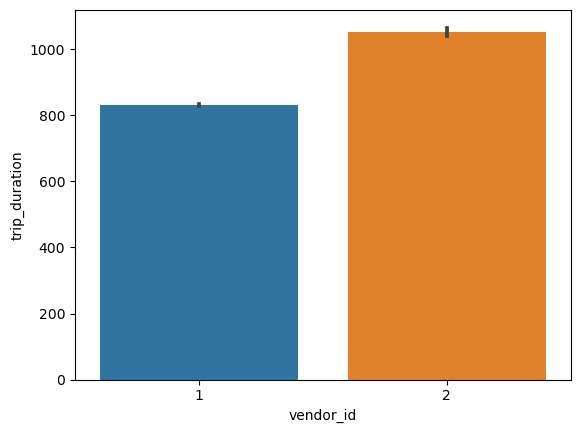

In [43]:
# Trip duration per vendor(graph showing avg trip duration of each vendor seperatly)
sns.barplot(x='vendor_id',y='trip_duration',data=df)

- We can see that  avg trip duration of vendor 2 is more 

C:\Users\Balasubramanian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


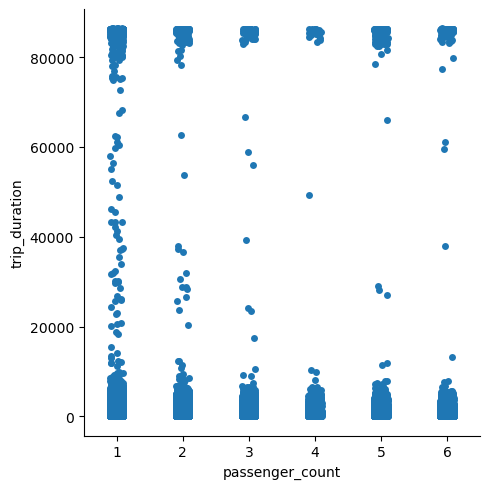

In [44]:
# Trip duration per passenger count(graph showing realation b/t passenger count and trip duration)
sns.catplot(x='passenger_count',y='trip_duration',data=df,kind='strip')

- There is no specific realtion b/t passenger count and trip duration

C:\Users\Balasubramanian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


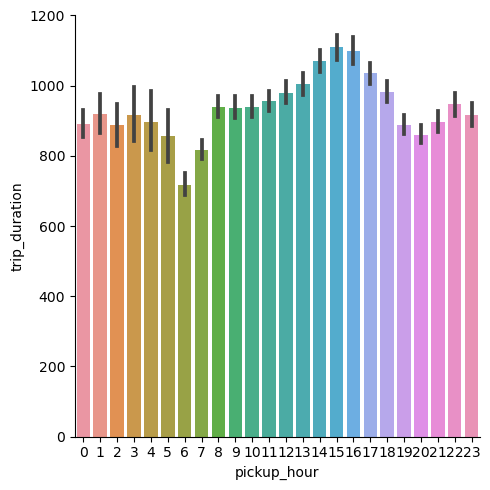

In [45]:
# Trip duration per hour (graph for showing trip duration wrt hour in a day)
sns.catplot(x='pickup_hour',y='trip_duration',data=df,kind='bar')

- Trip duration is higgest at 3:00 pm
- Trip duration is lowwest at 6:00 am

C:\Users\Balasubramanian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


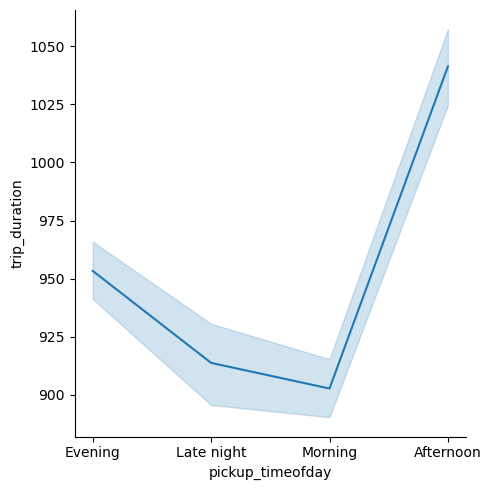

In [46]:
# Trip duration per time of the day ( graph showing trip duration wrt time of the day)
sns.relplot(x='pickup_timeofday',y='trip_duration',data=df,kind='line')

- Trip duration are high at Afternoon time
- Trip duration is lowest between Late night and Morning

In [47]:
# Trip duration per day of week (graph showing trip duration wrt day of the week
total_duration_per_day = df.groupby('pickup_day')['trip_duration'].sum()

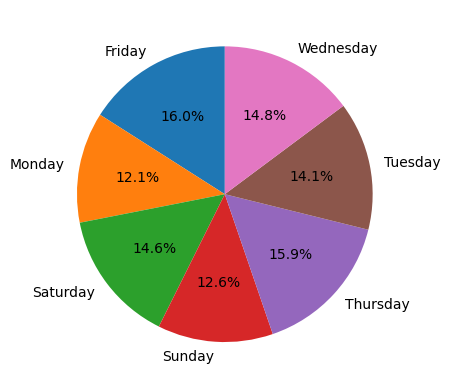

In [48]:
# Create a pie chart
plt.pie(total_duration_per_day, labels=total_duration_per_day.index, autopct='%.1f%%', startangle=90)
plt.show()

- Trip is longest on Thruday and Friday

C:\Users\Balasubramanian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


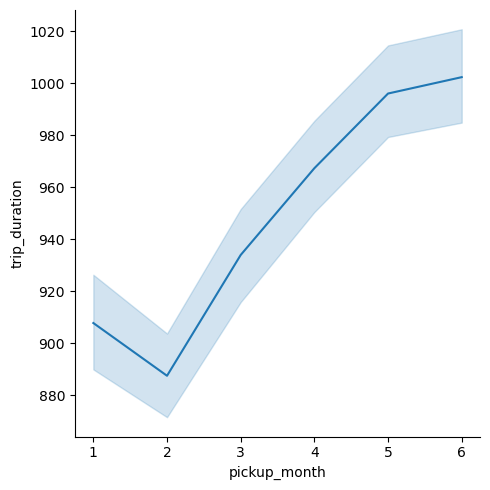

In [49]:
# Trip duration per month ( graph showing trip duration wrt to month)
sns.relplot(y='trip_duration',x='pickup_month',data=df,kind='line')

- The is an exponential rise in trip duration from february

<Axes: xlabel='vendor_id', ylabel='distance'>

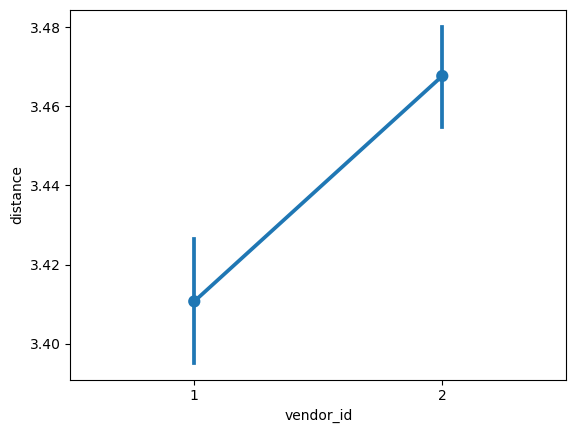

In [50]:
# Distance and vendor (graph showing Avg distance for both vendor)
sns.pointplot(x='vendor_id',y='distance',data=df)

- The avg distance travelled is almost same by the vendors

C:\Users\Balasubramanian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


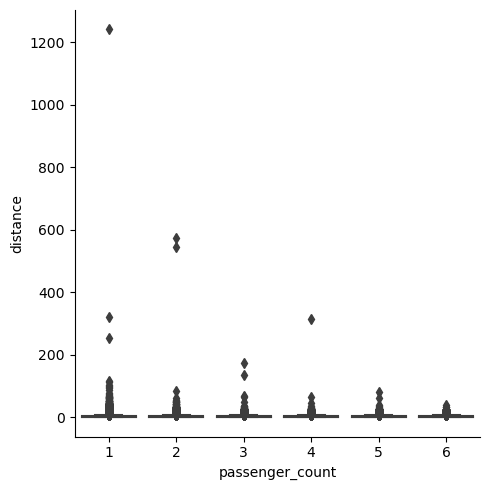

In [51]:
# Distance per passenger count (graph showing distance travelled by count of passenger)
sns.catplot(y='distance',x='passenger_count',data=df,kind='box')


- longer distance are covered by 1, 2 or 4 passenger

<Axes: xlabel='pickup_hour', ylabel='distance'>

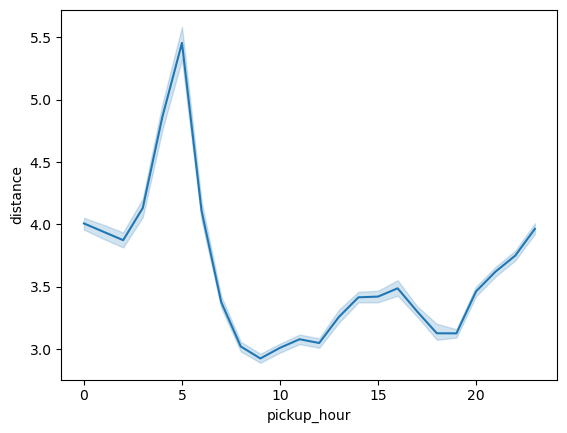

In [52]:
# Distance per hour of day(graph showing distance wrt to hour in a day)
sns.lineplot(x='pickup_hour',y='distance',data=df)

- Distance are longest at 5:00 am morning

<Axes: xlabel='pickup_timeofday', ylabel='distance'>

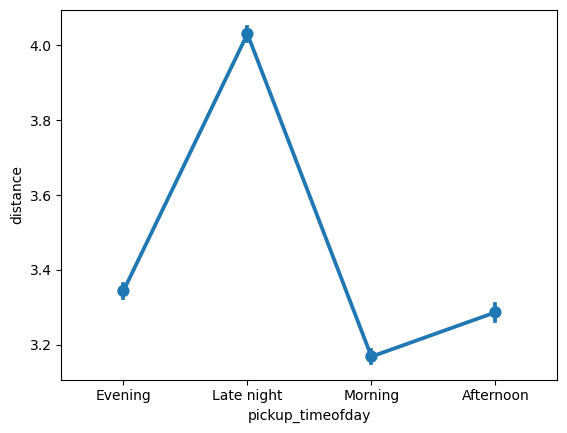

In [53]:
# distance per time of day (graph showing distance wrt to time of day)
sns.pointplot(x='pickup_timeofday',y='distance',data=df)

- Clearly Distance is more during late night and early morning time

<Axes: xlabel='pickup_day_no', ylabel='distance'>

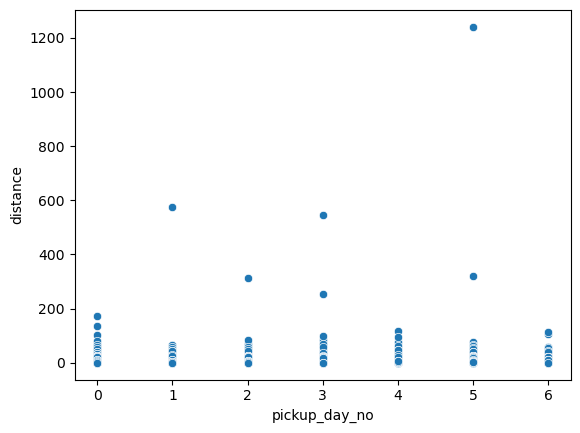

In [54]:
# distance per day of week (graph showing distance wrt to day of week)
sns.scatterplot(x='pickup_day_no',y='distance',data=df)

- Clearly  distances are longer on saturdays

<Axes: xlabel='pickup_month', ylabel='distance'>

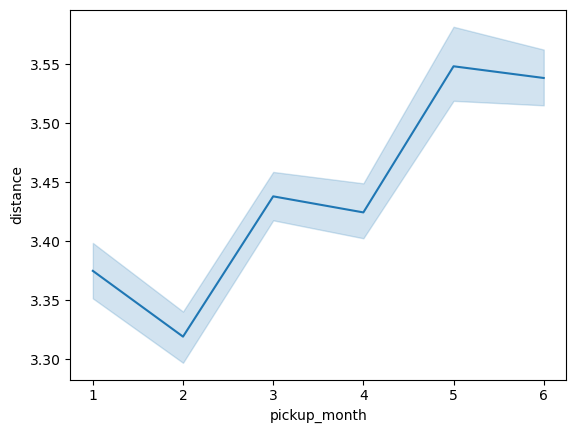

In [55]:
# distance per month ( graph showing distance wrt to month of week)
sns.lineplot(x='pickup_month',y='distance',data=df)

- As the no of trips increases from feb even the distance is increasing 

<Axes: xlabel='vendor_id', ylabel='passenger_count'>

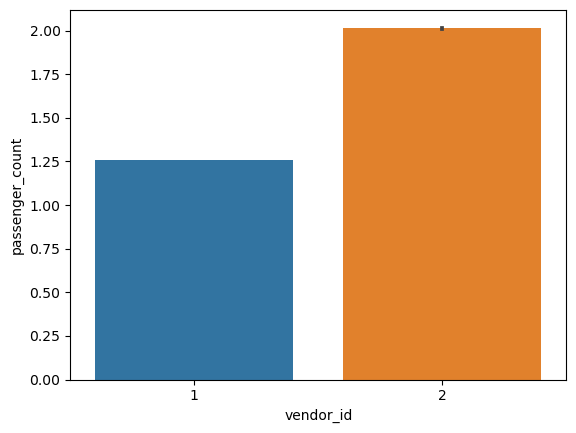

In [56]:
# Passenger count and vendor id
sns.barplot(y='passenger_count',x='vendor_id',data=df)

- This shows that vendor 2 generally carries 2 passengers 

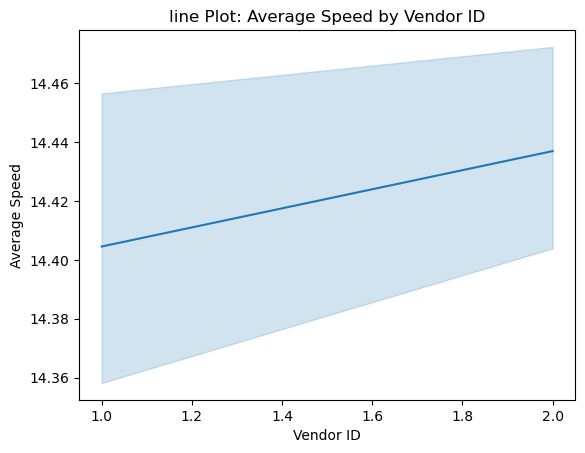

In [57]:
# AVG speed and vendor id
sns.lineplot(x='vendor_id', y='average_speed', data=df)
plt.xlabel('Vendor ID')
plt.ylabel('Average Speed')
plt.title('line Plot: Average Speed by Vendor ID')
plt.show()

- Avg spped of vendor 2 is more than vendor 1 slightly

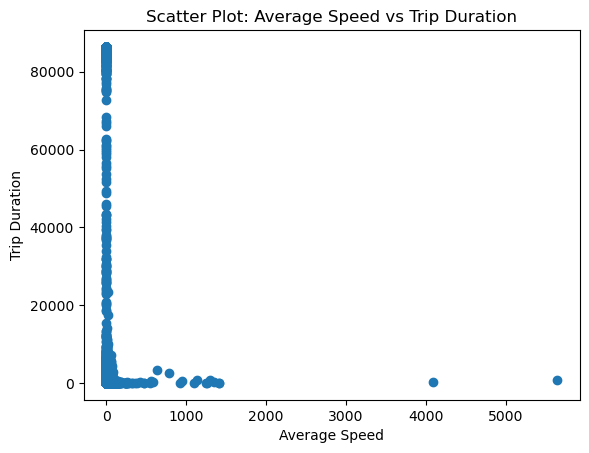

In [58]:
# Avg speed and trip duration
plt.scatter(df['average_speed'], df['trip_duration'])
plt.xlabel('Average Speed')
plt.ylabel('Trip Duration')
plt.title('Scatter Plot: Average Speed vs Trip Duration')
plt.show()

 WE canclearly see that 
- avg speed is more for 0 trip durtion
- avg speed is less for larger trip duration

<Axes: xlabel='distance', ylabel='trip_duration'>

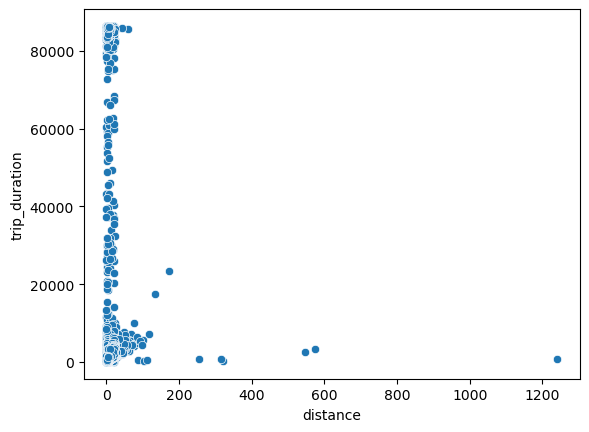

In [59]:
#Trip duration and Distance
sns.scatterplot(x='distance',y='trip_duration',data=df)

- Here trip with 0 km has large trip duration
- Here trip with large distance has lower trip duration
- This can be because of wronge coordintes
- This can be because of not ending or cancelling the trip from customers side

# Observation
- we did our bivariant analysis
- found out some relation between few features 
- some dont have a relation at all

In [60]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance,average_speed
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.95391845703125,40.77887344360352,-73.96387481689453,40.77116394042969,N,...,0,0,16,16,2,2,Evening,Evening,1.1990743076458716,10.791668768812846
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.98831176757811,40.73174285888672,-73.9947509765625,40.69493103027344,N,...,4,4,23,23,3,3,Late night,Late night,4.129116820813601,13.513473231753602
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314453125,40.721458435058594,-73.94802856445312,40.774917602539055,N,...,6,6,17,18,2,2,Evening,Evening,7.250763132438279,15.964983043900798
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961669921875,40.75971984863281,-73.95677947998048,40.780628204345696,N,...,1,1,9,10,1,1,Morning,Morning,2.361100698353076,7.449572755539942
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.01712036132812,40.70846939086913,-73.9881820678711,40.740631103515625,N,...,2,2,6,6,2,2,Morning,Morning,4.328540005092545,18.375877380109863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.9659194946289,40.78977966308594,-73.95263671875,40.78918075561523,N,...,5,5,13,13,5,5,Afternoon,Afternoon,1.1202245123789978,13.624352177582406
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.99666595458984,40.73743438720703,-74.0013198852539,40.731910705566406,N,...,0,0,0,0,2,2,Late night,Late night,0.7287056925696218,8.328065057938536
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.99784851074219,40.761695861816406,-74.00148773193358,40.741207122802734,N,...,4,4,18,19,4,4,Evening,Evening,2.2987787790922516,12.296587822781733
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.00670623779298,40.70824432373047,-74.0135498046875,40.71381378173828,N,...,6,6,9,9,6,6,Morning,Morning,0.8463169642324843,6.815975550865645


#  5) Sorting Outliers

#  Distance

<Axes: xlabel='distance'>

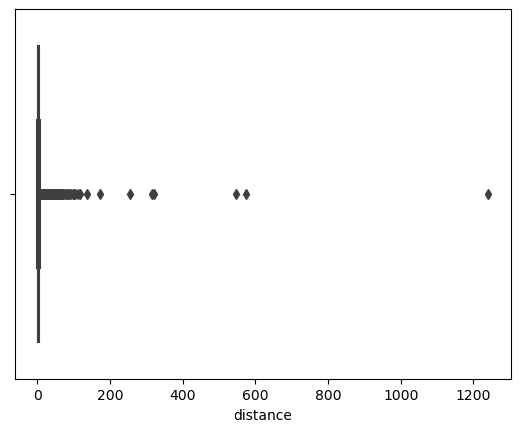

In [61]:
#checking for outlies in Total Distance
sns.boxplot(x='distance',data=df)


- WE can clearly see there are outliers so we will handel it now

In [62]:
# Calculate the IQR (Interquartile Range)
Q1 = df['distance'].quantile(0.25)
Q3 = df['distance'].quantile(0.75)
IQR = Q3 - Q1

In [63]:
# Define the upper and lower bounds to identify outliers(25 and 75 percentile)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [64]:
# Identify outliers
outliers = df[(df['distance'] < lower_bound) | (df['distance'] > upper_bound)]

# Display the number of outliers
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 70315


- total number of outlier are 70315
- We can either impute(replace), remove or transform data
- we cant remove data as it will be data loss

C:\Users\Balasubramanian\AppData\Local\Temp\ipykernel_2324\2975798948.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


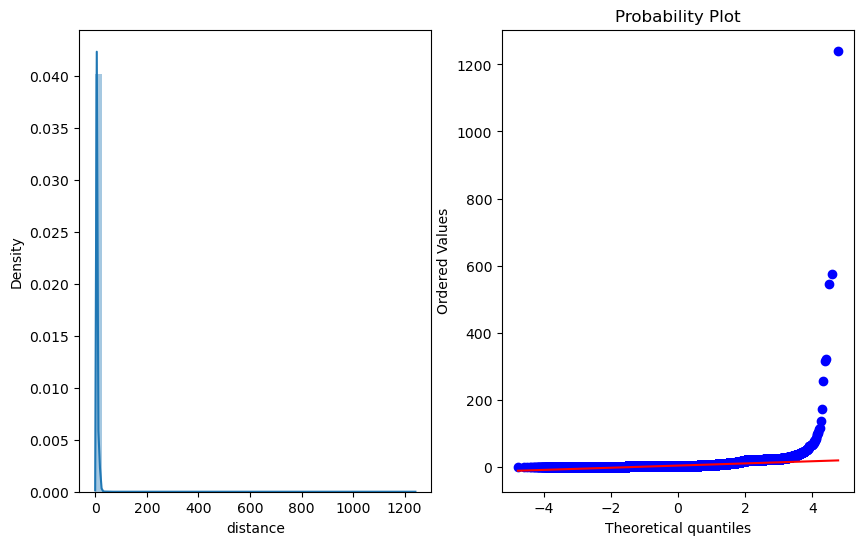

In [65]:
#checking the graph
# QQ plot (for ploting histogram and probplot)
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
#     df[feature].hist()
    sns.distplot(df[feature])
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
plot_data(df,'distance')

In [66]:
df[df.distance ==0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance,average_speed
263,id3155891,2,2016-06-28 11:21:00,2016-06-28 11:25:00,2,-73.99642181396483,40.298828125,-73.99642181396483,40.298828125,N,...,1,1,11,11,6,6,Morning,Morning,0.0,0.0
327,id0786923,2,2016-03-26 13:34:38,2016-03-26 13:37:17,1,-73.99632263183594,40.75345993041992,-73.99632263183594,40.75345993041992,N,...,5,5,13,13,3,3,Afternoon,Afternoon,0.0,0.0
795,id2323213,2,2016-06-13 16:49:52,2016-06-13 17:04:49,5,-73.96717071533203,40.76350021362305,-73.96717071533203,40.76350021362305,N,...,0,0,16,17,6,6,Evening,Evening,0.0,0.0
1176,id3235868,1,2016-02-29 21:39:52,2016-02-29 21:44:08,1,-73.99523162841797,40.74403762817383,-73.99523162841797,40.74403762817383,N,...,0,0,21,21,2,2,Evening,Evening,0.0,0.0
1257,id1865738,2,2016-03-13 11:38:36,2016-03-13 12:00:46,2,-73.91278076171875,40.80442810058594,-73.91278076171875,40.80442810058594,N,...,6,6,11,12,3,3,Morning,Afternoon,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728720,id3423342,2,2016-05-05 21:32:43,2016-05-05 21:32:57,2,-73.97789764404298,40.76639175415039,-73.97789764404298,40.76639175415039,N,...,3,3,21,21,5,5,Evening,Evening,0.0,0.0
728775,id2618105,2,2016-03-13 20:06:40,2016-03-13 20:14:24,1,-73.97425842285155,40.75989532470703,-73.97425842285155,40.75989532470703,N,...,6,6,20,20,3,3,Evening,Evening,0.0,0.0
728838,id1232120,2,2016-05-29 04:04:32,2016-05-29 04:11:33,2,-73.98455810546875,40.75083923339844,-73.98455810546875,40.75083923339844,N,...,6,6,4,4,5,5,Late night,Late night,0.0,0.0
729025,id3524028,2,2016-04-06 18:03:34,2016-04-06 18:26:23,1,-74.08361053466798,40.63240051269531,-74.08361053466798,40.63240051269531,N,...,2,2,18,18,4,4,Evening,Evening,0.0,0.0


Now we have 2893 rows with 0 km data but they are not counted as an outlier
- we need to impute (replace) the rest of the outlier 

In [67]:
# Manulualy removing few visible outliers above 200
outlier=(df['distance']>200)
df.drop(df.loc[outlier].index,inplace=True)

In [68]:
# removing all other outliers
upper_bound = df['distance'].quantile(0.99)
# Handle outliers by setting them to the upper or lower bound
df['distance'] = df['distance'].clip(upper=upper_bound)

Capping:

- Replace values above a certain threshold with the threshold value (upper bound).
- Replace values below a certain threshold with the threshold value (lower bound).

In [69]:
# (checking for outlies after removing 0km distance)
# Identify outliers
outliers = df[(df['distance'] < lower_bound) | (df['distance'] > upper_bound)]

In [70]:
# Display the number of outliers
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 0


- Finaly we dont have any outliers

# Trip duration

<Axes: xlabel='trip_duration'>

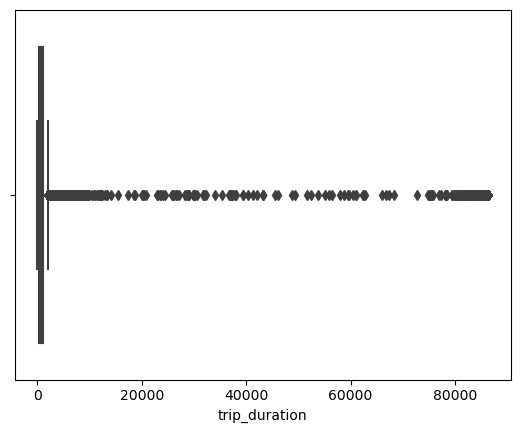

In [71]:
#checking for outlies in Trip duration
sns.boxplot(x='trip_duration',data=df)

In [72]:
# Calculate the IQR (Interquartile Range)
Q1 = df['trip_duration'].quantile(0.25)
Q3 = df['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

In [73]:
# Define the upper and lower bounds to identify outliers(25 and 75 percentile)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [74]:
# Identify outliers
outliers = df[(df['trip_duration'] < lower_bound) | (df['trip_duration'] > upper_bound)]

# Display the number of outliers
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 36957


C:\Users\Balasubramanian\AppData\Local\Temp\ipykernel_2324\3181629130.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


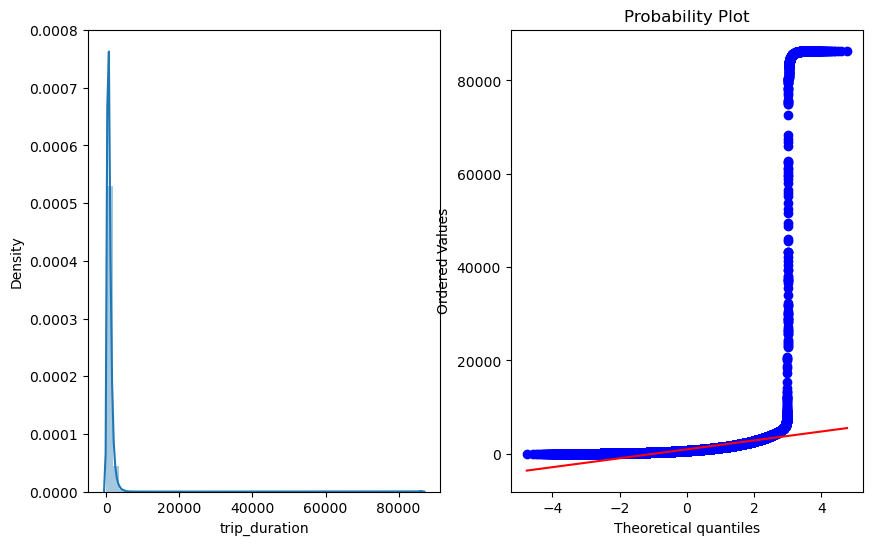

In [75]:
#checking the graph
# QQ plot (for ploting histogram and probplot)
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
#     df[feature].hist()
    sns.distplot(df[feature])
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
plot_data(df,'trip_duration')

In [76]:
# Removing the outliers
upper_bound = df['trip_duration'].quantile(0.99)  # Set your desired upper quantile
lower_bound = df['trip_duration'].quantile(0.01)  # Set your desired lower quantile

# Cap values above the upper bound
df['trip_duration'] = df['trip_duration'].clip(upper=upper_bound)

# Cap values below the lower bound
df['trip_duration'] = df['trip_duration'].clip(lower=lower_bound)

Capping:

- Replace values above a certain threshold with the threshold value (upper bound).
- Replace values below a certain threshold with the threshold value (lower bound).

In [77]:
# Identify outliers
outliers = df[(df['trip_duration'] < lower_bound) | (df['trip_duration'] > upper_bound)]

# Display the number of outliers
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 0


- Finaly we dont have any outliers

# Average speed

<Axes: xlabel='average_speed'>

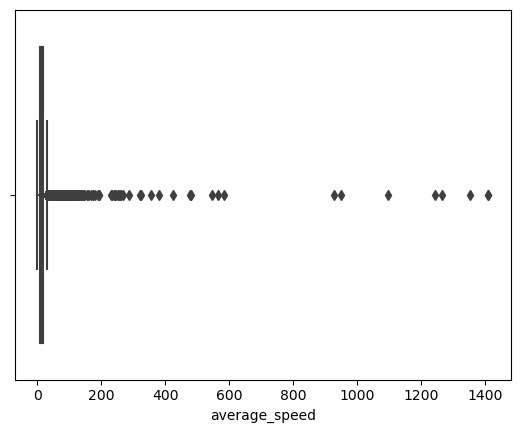

In [78]:
#checking for outlies in Trip duration
sns.boxplot(x='average_speed',data=df)

- Clearly we have a lot of outliers

In [79]:
# Calculate the IQR (Interquartile Range)
Q1 = df['average_speed'].quantile(0.25)
Q3 = df['average_speed'].quantile(0.75)
IQR = Q3 - Q1

In [80]:
# Define the upper and lower bounds to identify outliers(25 and 75 percentile)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [81]:
# Identify outliers
outliers = df[(df['average_speed'] < lower_bound) | (df['average_speed'] > upper_bound)]

# Display the number of outliers
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 29856



- total number of outlier are 29856
- We can either impute(replace), remove or transform data
- we cant remove data as it will be data loss

C:\Users\Balasubramanian\AppData\Local\Temp\ipykernel_2324\2659798398.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


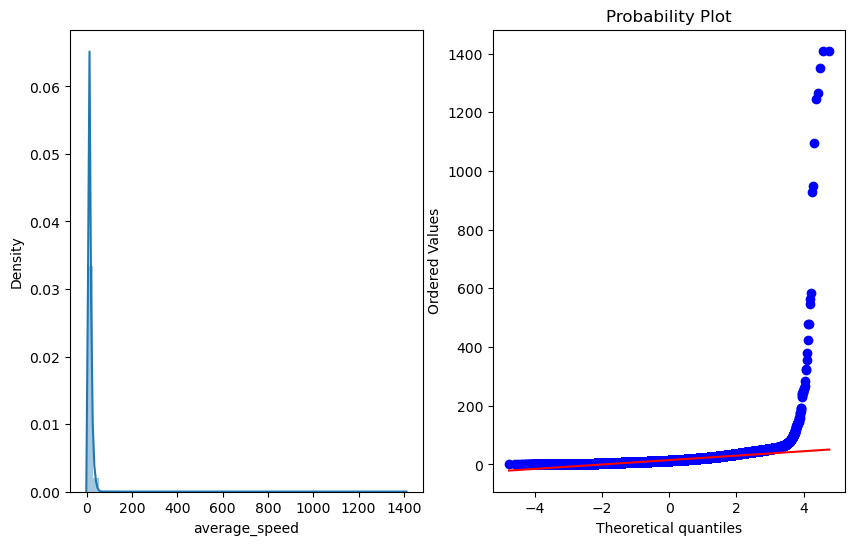

In [82]:
#checking the graph
# QQ plot (for ploting histogram and probplot)
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
#     df[feature].hist()
    sns.distplot(df[feature])
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
plot_data(df,'average_speed')

In [83]:
# Manulualy removing few visible outliers above 200
outlier=(df['average_speed']>200)
df.drop(df.loc[outlier].index,inplace=True)

In [84]:
# Removing the outliers
upper_bound = df['average_speed'].quantile(0.99)  # Set your desired upper quantile
lower_bound = df['average_speed'].quantile(0.01)  # Set your desired lower quantile

# Cap values above the upper bound
df['average_speed'] = df['average_speed'].clip(upper=upper_bound)

# Cap values below the lower bound
df['average_speed'] = df['average_speed'].clip(lower=lower_bound)

Capping:

- Replace values above a certain threshold with the threshold value (upper bound).
- Replace values below a certain threshold with the threshold value (lower bound).

In [85]:
# (checking for outlies after removing)
# Identify outliers
outliers = df[(df['average_speed'] < lower_bound) | (df['average_speed'] > upper_bound)]

# Display the number of outliers
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 0


- Finaly we dont have any outliers

# Observation
- We have removed all the outliers from Trip _duration , Total Distance and average speed

# 6)Feature Engineering
- Here there are no missing values 
- here there are no temporal variables (year varialble as year is same constant here)

# Feature scaling (Gaussian Transformation)

# Distance

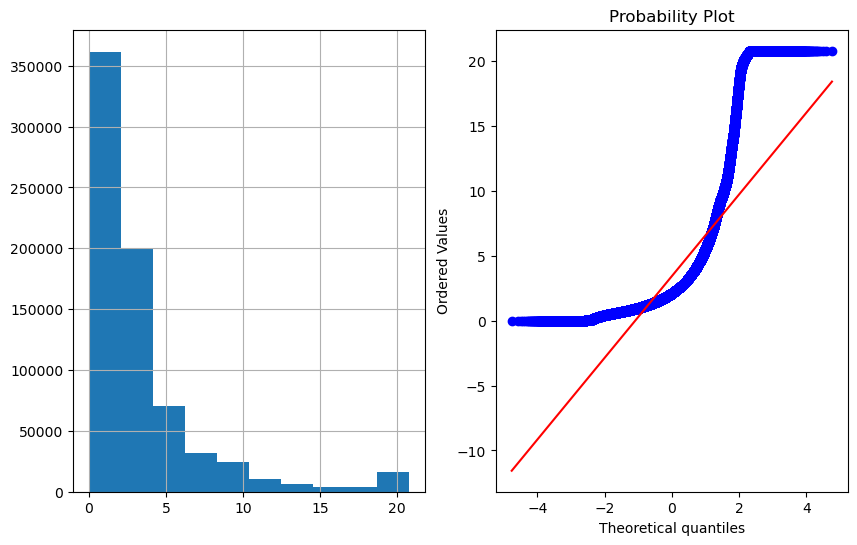

In [86]:
# QQ plot (for ploting histogram and probplot)
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
plot_data(df,'distance')

In [87]:
skew(df['distance'])

2.688365628180158

Our graph is positively right skwed
- lets perform trans formation scale the features

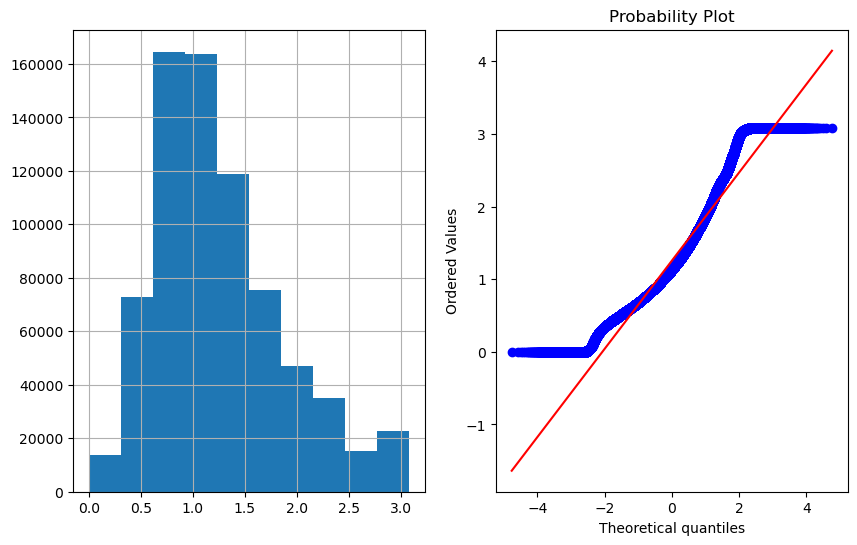

In [88]:
#Log transformation
df['distance_log']=np.log(df['distance']+1)
plot_data(df,'distance_log')


In [89]:
skew(df['distance_log'])

0.8775524425833047

The graph is right skwed (0.877)

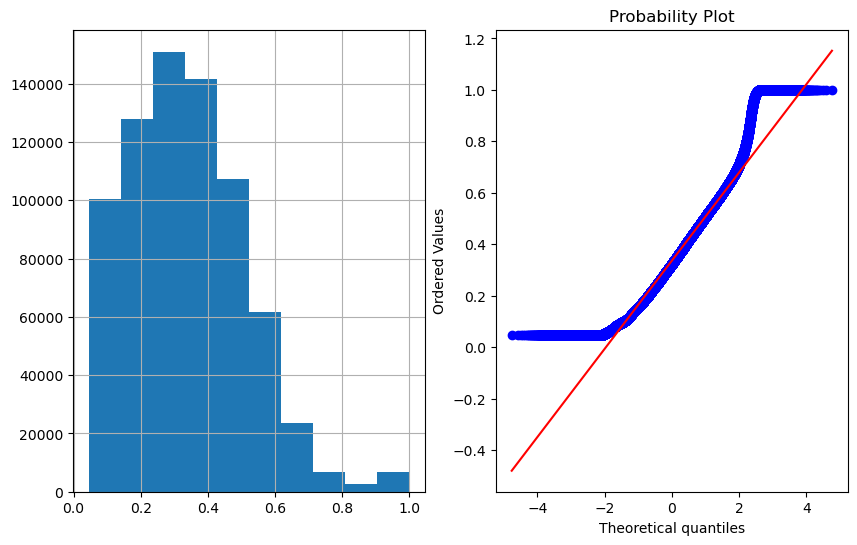

In [90]:
# Reciprocal Transformation
df['distance_rec']=1/(df['distance']+1)
plot_data(df,'distance_rec')

In [91]:
skew(df['distance_rec'])

0.6661773731180871

The graph is right skwed (0.877)

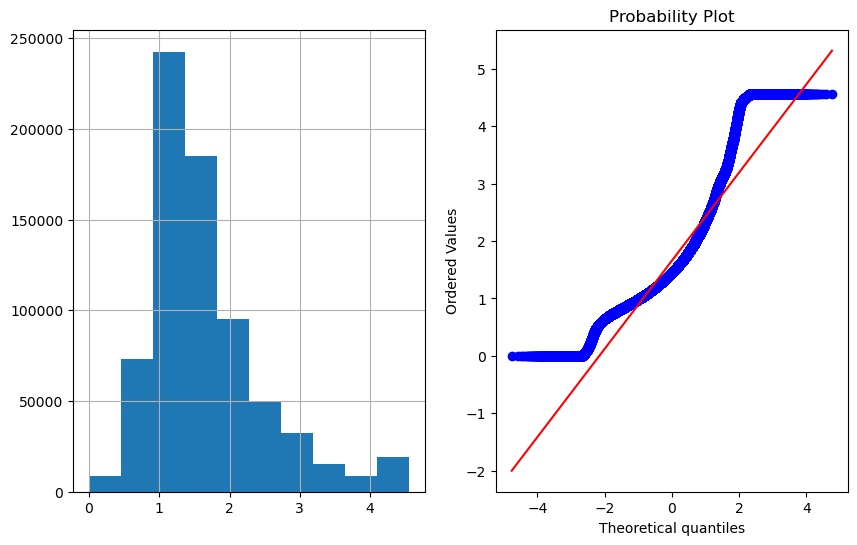

In [92]:
#square root transformation
df['distance_root']=df.distance**(1/2)
plot_data(df,'distance_root')

In [93]:
skew(df['distance_root'])

1.4515970507999898

The graph is right skwed (1.451)

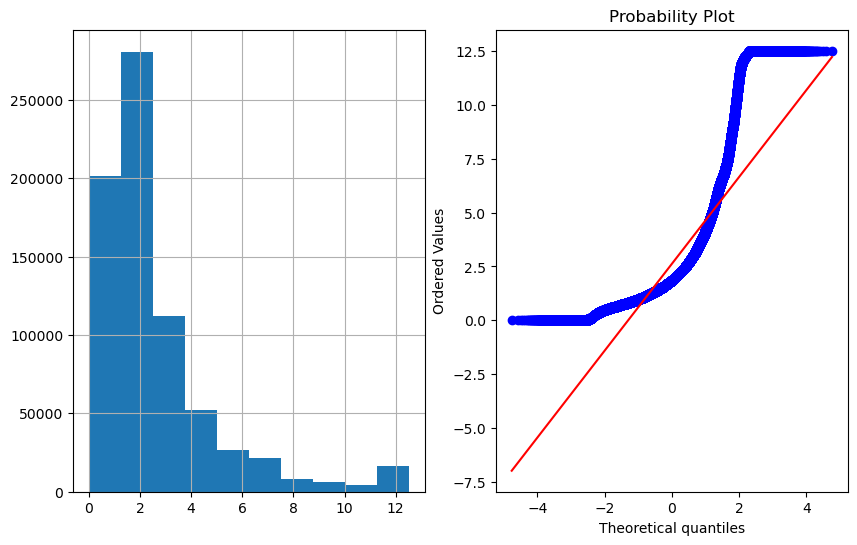

In [94]:
#exponential Transformation
df['distance_exp']=df.distance**(1/1.2)
plot_data(df,'distance_exp')

In [95]:
skew(df['distance_exp'])

2.3049313768705506

The graph is right skwed (2.30)

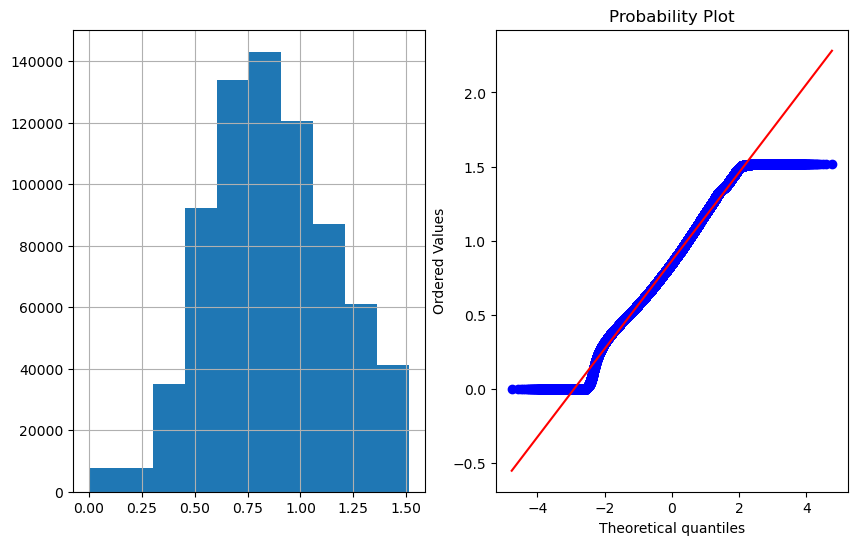

In [96]:
# Box cox transformation
df['distance_boxcox'], lambda_value = stats.boxcox(df['distance']+1)
plot_data(df,'distance_boxcox')

In [97]:
skew(df['distance_boxcox'])

0.045846340889670475

The graph is right skwed (0.045) The best transformation

In [98]:
# Droping columns which are not required as we did it for analysis
columns_to_drop = ['distance_log','distance_rec','distance_root','distance_exp']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Trip_duration

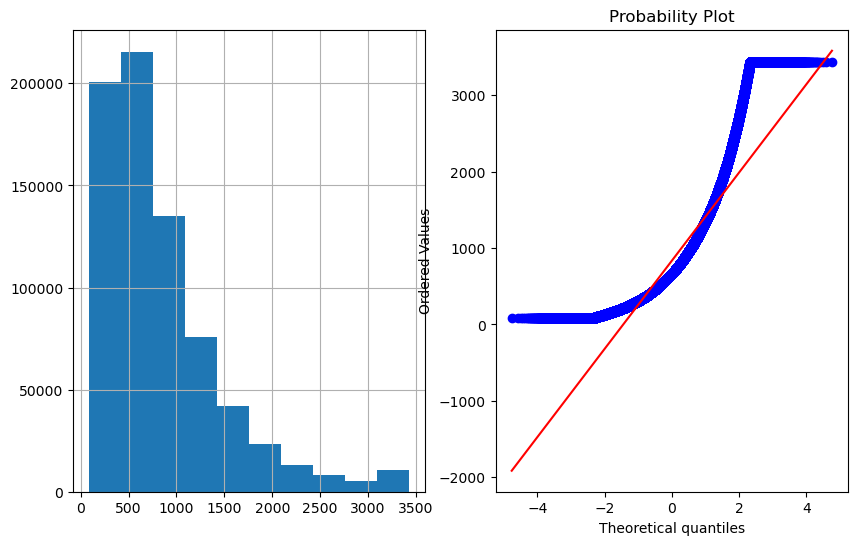

In [99]:
# QQ plot (for ploting histogram and probplot)
def plot_data(df,feature):
   plt.figure(figsize=(10,6))
   plt.subplot(1,2,1)
   df[feature].hist()
   plt.subplot(1,2,2)
   stats.probplot(df[feature],dist='norm',plot=pylab)
   plt.show()
plot_data(df,'trip_duration')


In [100]:
skew(df['trip_duration'])

1.730394913215727

Our graph is positively right skwed
- lets perform transformation scale the features 


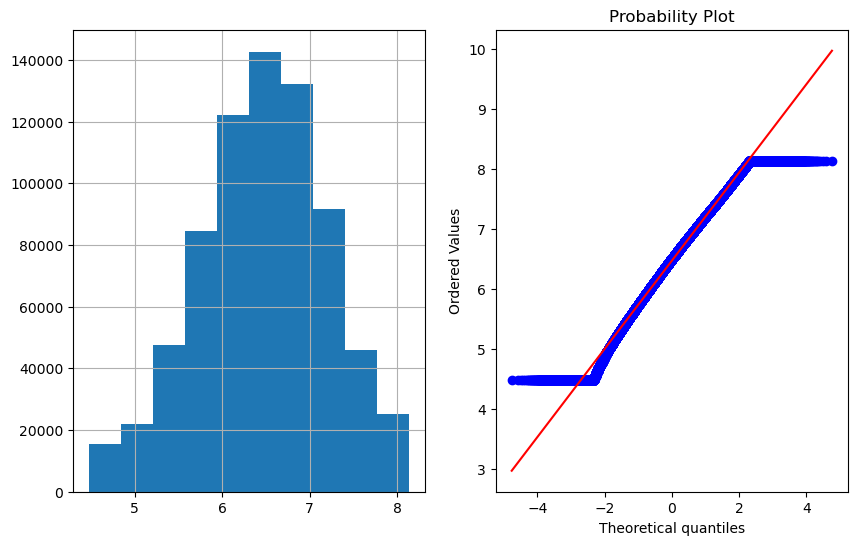

In [101]:
#Log transformation
df['trip_duration_log']=np.log(df['trip_duration']+1)
plot_data(df,'trip_duration_log')

In [102]:
skew(df['trip_duration_log'])

-0.2071232084296634

The graph is negatively skwed (-0.20)

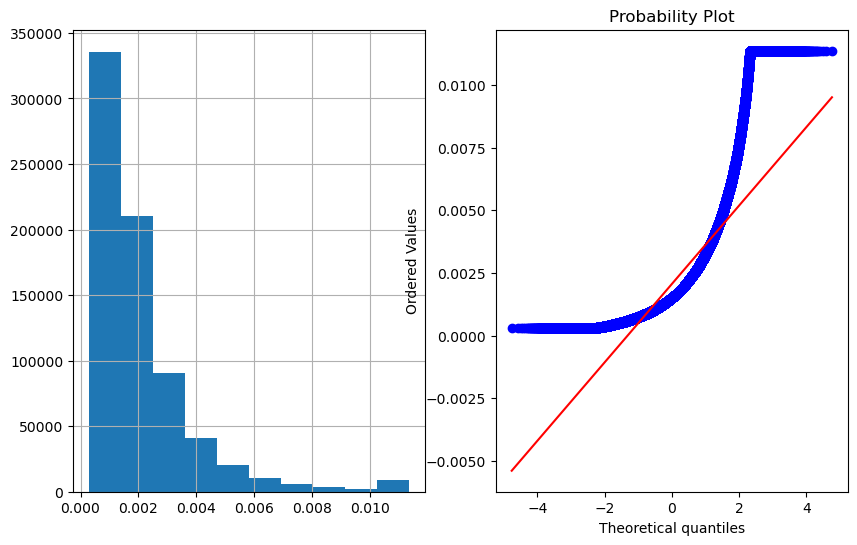

In [103]:
# Reciprocal Transformation
df['trip_duration_rec']=1/(df['trip_duration']+1)
plot_data(df,'trip_duration_rec')

In [104]:
skew(df['trip_duration_rec'])

2.570115019719763

The graph is postivily skwed (2.57)

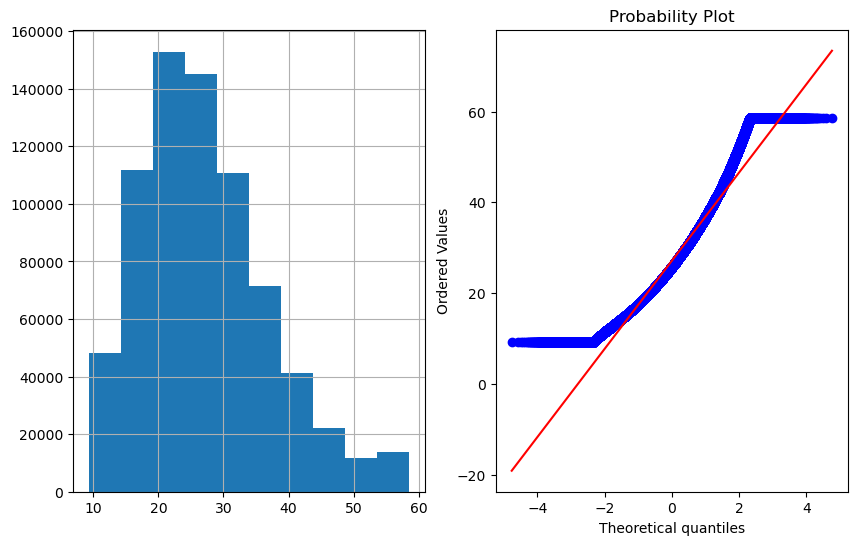

In [105]:
#square root transformation
df['trip_duration_root']=df.trip_duration**(1/2)
plot_data(df,'trip_duration_root')

In [106]:
skew(df['trip_duration_root'])

0.7675627290947126

The graph is positively skwed (0.767)

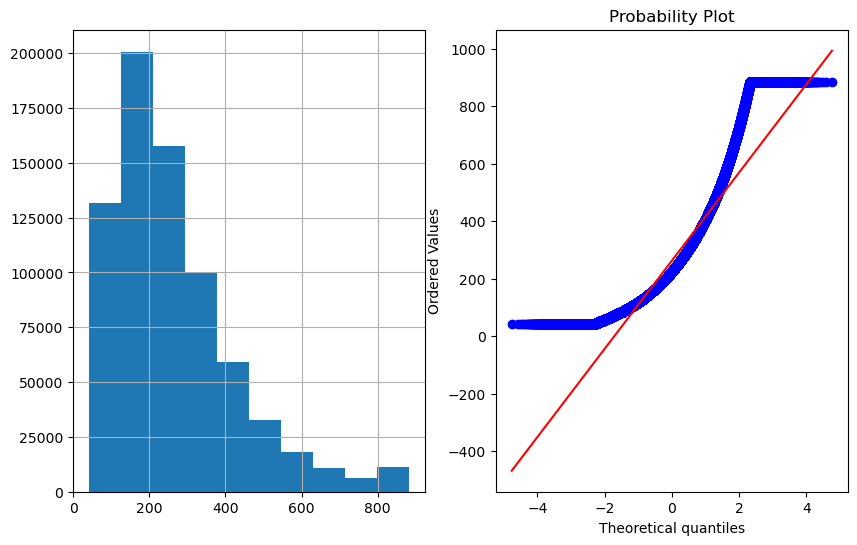

In [107]:
#exponential Transformation
df['trip_duration_exp']=df.trip_duration**(1/1.2)
plot_data(df,'trip_duration_exp')

In [108]:
skew(df['trip_duration_exp'])

1.4084065859047217

The graph is positively skwed (1.408)

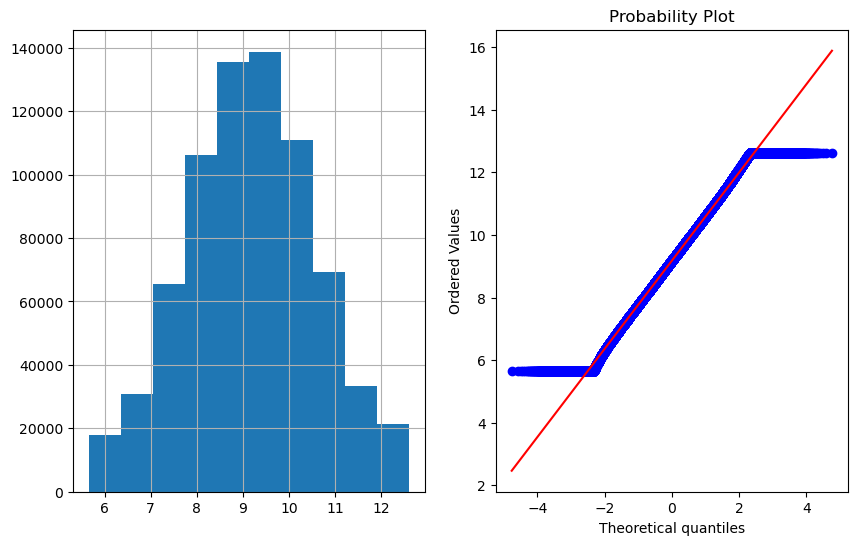

In [109]:
# Box cox transformation
df['trip_duration_boxcox'], lambda_value = stats.boxcox(df['trip_duration']+1)
plot_data(df,'trip_duration_boxcox')

In [110]:
skew(df['trip_duration_boxcox'])

-0.00509137034475078

The graph is negatively skwed (0.0509) the best of all


In [111]:
# Droping columns which are not required as we did it for analysis
columns_to_drop = ['trip_duration_log','trip_duration_rec','trip_duration_root','trip_duration_exp']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Average speed

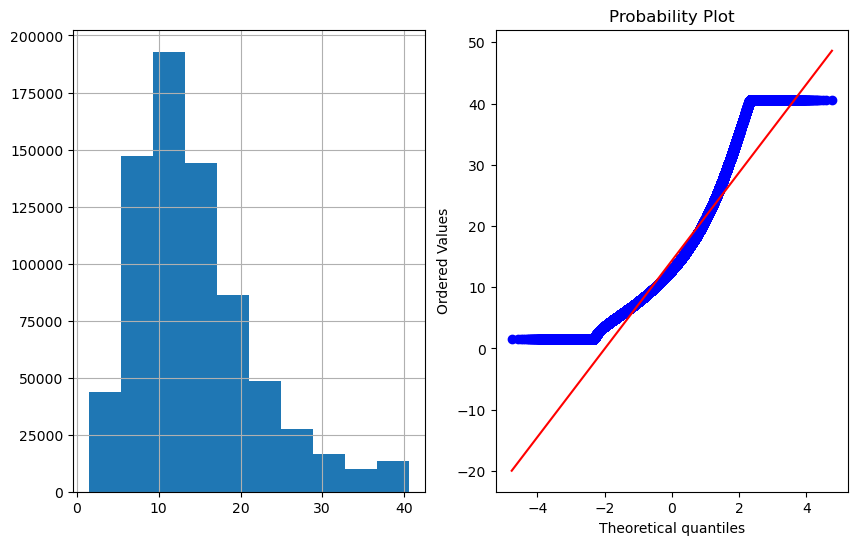

In [112]:
# QQ plot (for ploting histogram and probplot)
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
plot_data(df,'average_speed')


In [113]:
skew(df['average_speed'])

1.1633244873367419

We have a positive skew of (1.1633)

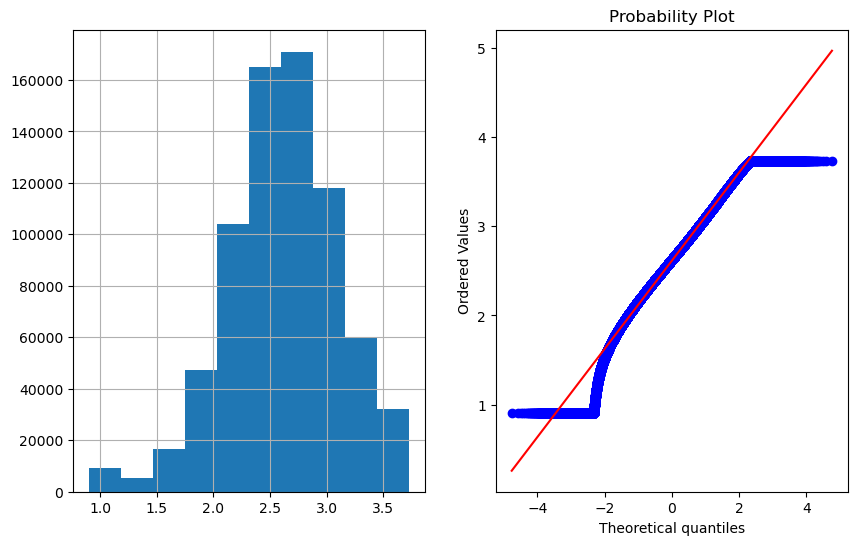

In [114]:
#Log transformation
df['average_speed_log']=np.log(df['average_speed']+1)
plot_data(df,'average_speed_log')

In [115]:
skew(df['average_speed_log'])

-0.4078796361708578

We have a negative skew of (0.4078)

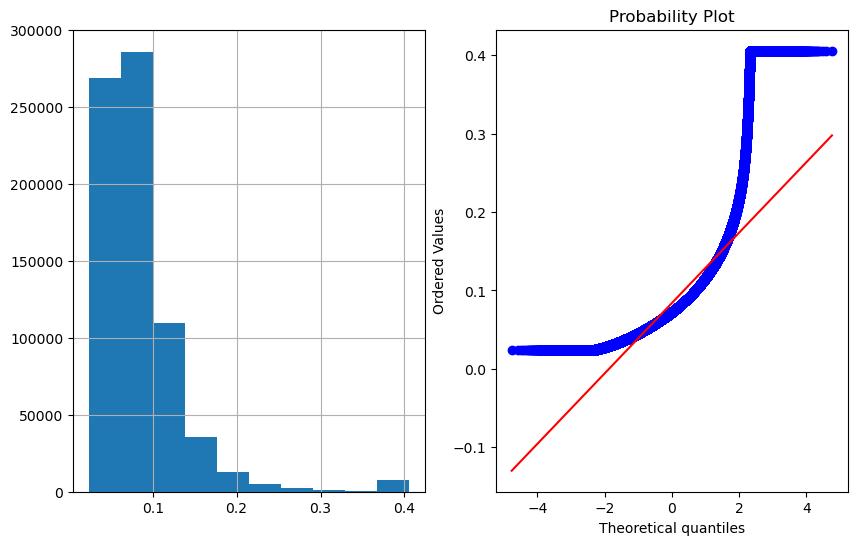

In [116]:
# Reciprocal Transformation
df['average_speed_rec']=1/(df['average_speed']+1)
plot_data(df,'average_speed_rec')

In [117]:
skew(df['average_speed_rec'])

3.153343823653656

we have positive skew of (3.1533)

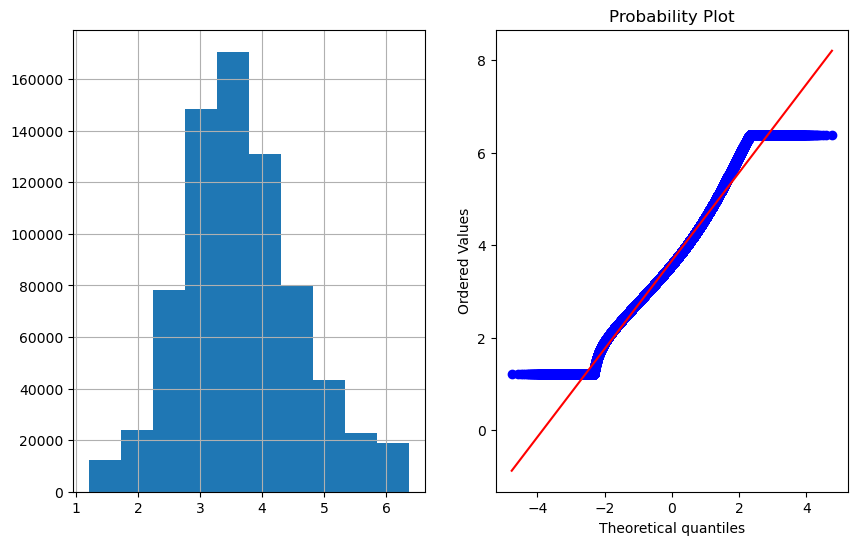

In [118]:
#square root transformation
df['average_speed_root']=df.average_speed**(1/2)
plot_data(df,'average_speed_root')

In [119]:
skew(df['average_speed_root'])

0.37585000964604204

 we have a positive skew of (0.3758)

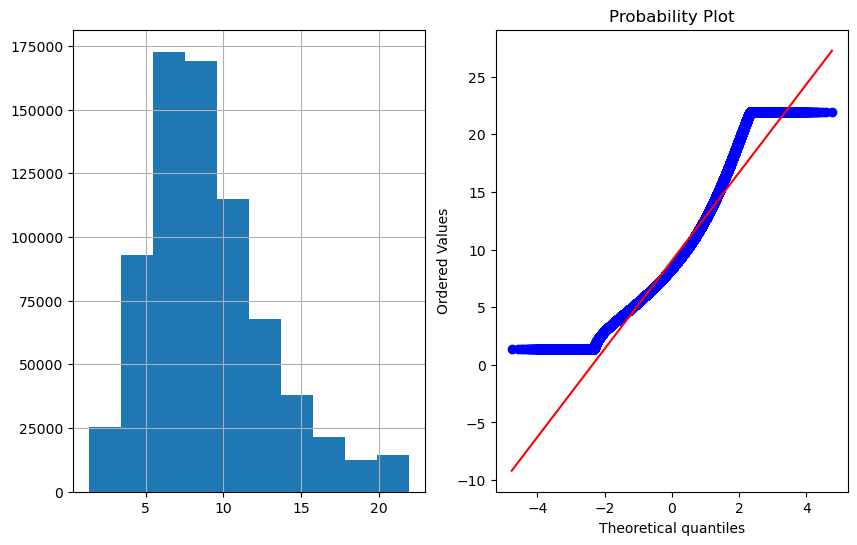

In [120]:
#exponential Transformation
df['average_speed_exp']=df.average_speed**(1/1.2)
plot_data(df,'average_speed_exp')

In [121]:
skew(df['average_speed_exp'])

0.9163052659244709

 we have a posivitve skew of (0.9163)

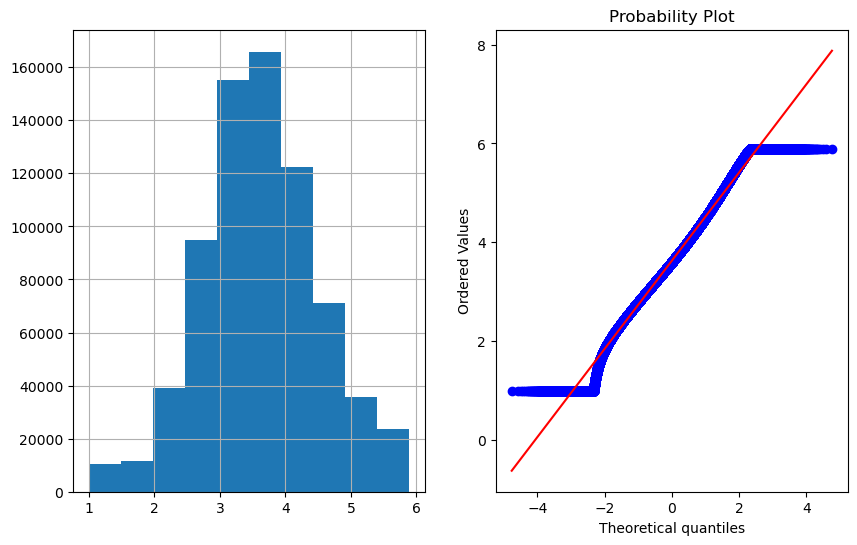

In [122]:
# Box cox transformation
df['average_speed_boxcox'], lambda_value = stats.boxcox(df['average_speed']+1)
plot_data(df,'average_speed_boxcox')

In [123]:
skew(df['average_speed_boxcox'])

0.012465506963151539

We have a positive skew of (0.012) and the best of all

In [124]:
# Droping columns which are not required as we did it for analysis
columns_to_drop = ['average_speed_log','average_speed_rec','average_speed_root','average_speed_exp',]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

In [125]:
# Droping  base columns which have been transformed 
columns_to_drop = ['average_speed','distance','trip_duration',]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Observation
- WE did feature scaling on the target variable and distance variable and avg speed

In [126]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance_boxcox,trip_duration_boxcox,average_speed_boxcox
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.95391845703125,40.77887344360352,-73.96387481689453,40.77116394042969,N,...,0,16,16,2,2,Evening,Evening,0.643673779863044,8.230860074730376,3.3164819012149067
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.98831176757811,40.73174285888672,-73.9947509765625,40.69493103027344,N,...,4,23,23,3,3,Late night,Late night,1.0919281646043204,10.175836708730024,3.6907028253363725
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314453125,40.721458435058594,-73.94802856445312,40.774917602539055,N,...,6,17,18,2,2,Evening,Evening,1.2678936708846444,10.99416553350066,3.983875497403836
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961669921875,40.75971984863281,-73.95677947998048,40.780628204345696,N,...,1,9,10,1,1,Morning,Morning,0.8933569993309994,10.250024566184207,2.7519371908562587
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.01712036132812,40.70846939086913,-73.9881820678711,40.740631103515625,N,...,2,6,6,2,2,Morning,Morning,1.1077475534498609,9.656252123291564,4.24186650990429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.9659194946289,40.78977966308594,-73.95263671875,40.78918075561523,N,...,5,13,13,5,5,Afternoon,Afternoon,0.6194313615898936,7.689855263138423,3.7047572261766644
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.99666595458984,40.73743438720703,-74.0013198852539,40.731910705566406,N,...,0,0,0,2,2,Late night,Late night,0.474863053506247,7.800258584232189,2.915013751965043
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.99784851074219,40.761695861816406,-74.00148773193358,40.741207122802734,N,...,4,18,19,4,4,Evening,Evening,0.8834890802671888,9.206083514873482,3.5307402920851665
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.00670623779298,40.70824432373047,-74.0135498046875,40.71381378173828,N,...,6,9,9,6,6,Morning,Morning,0.5231995708013041,8.434748399740604,2.6260037065618924


In [127]:
# Droping categorical variables
df = df.drop(columns=['store_and_fwd_flag','pickup_timeofday','dropoff_timeofday','pickup_day','dropoff_day','id'])

In [128]:
df

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance_boxcox,trip_duration_boxcox,average_speed_boxcox
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.95391845703125,40.77887344360352,-73.96387481689453,40.77116394042969,0,0,16,16,2,2,0.643673779863044,8.230860074730376,3.3164819012149067
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.98831176757811,40.73174285888672,-73.9947509765625,40.69493103027344,4,4,23,23,3,3,1.0919281646043204,10.175836708730024,3.6907028253363725
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314453125,40.721458435058594,-73.94802856445312,40.774917602539055,6,6,17,18,2,2,1.2678936708846444,10.99416553350066,3.983875497403836
3,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961669921875,40.75971984863281,-73.95677947998048,40.780628204345696,1,1,9,10,1,1,0.8933569993309994,10.250024566184207,2.7519371908562587
4,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.01712036132812,40.70846939086913,-73.9881820678711,40.740631103515625,2,2,6,6,2,2,1.1077475534498609,9.656252123291564,4.24186650990429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.9659194946289,40.78977966308594,-73.95263671875,40.78918075561523,5,5,13,13,5,5,0.6194313615898936,7.689855263138423,3.7047572261766644
729318,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.99666595458984,40.73743438720703,-74.0013198852539,40.731910705566406,0,0,0,0,2,2,0.474863053506247,7.800258584232189,2.915013751965043
729319,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.99784851074219,40.761695861816406,-74.00148773193358,40.741207122802734,4,4,18,19,4,4,0.8834890802671888,9.206083514873482,3.5307402920851665
729320,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.00670623779298,40.70824432373047,-74.0135498046875,40.71381378173828,6,6,9,9,6,6,0.5231995708013041,8.434748399740604,2.6260037065618924


# 7) Multivarian Analysis
- we try to analys more than 2 variable togrther

C:\Users\Balasubramanian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


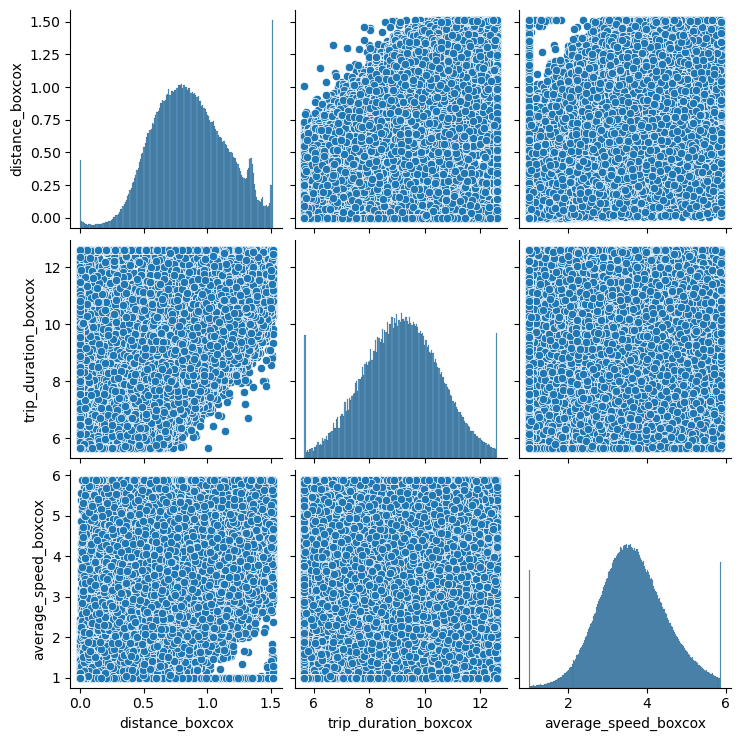

In [129]:
# ploting realation between distance duration and speed
sns.pairplot(df[['distance_boxcox', 'trip_duration_boxcox', 'average_speed_boxcox']])

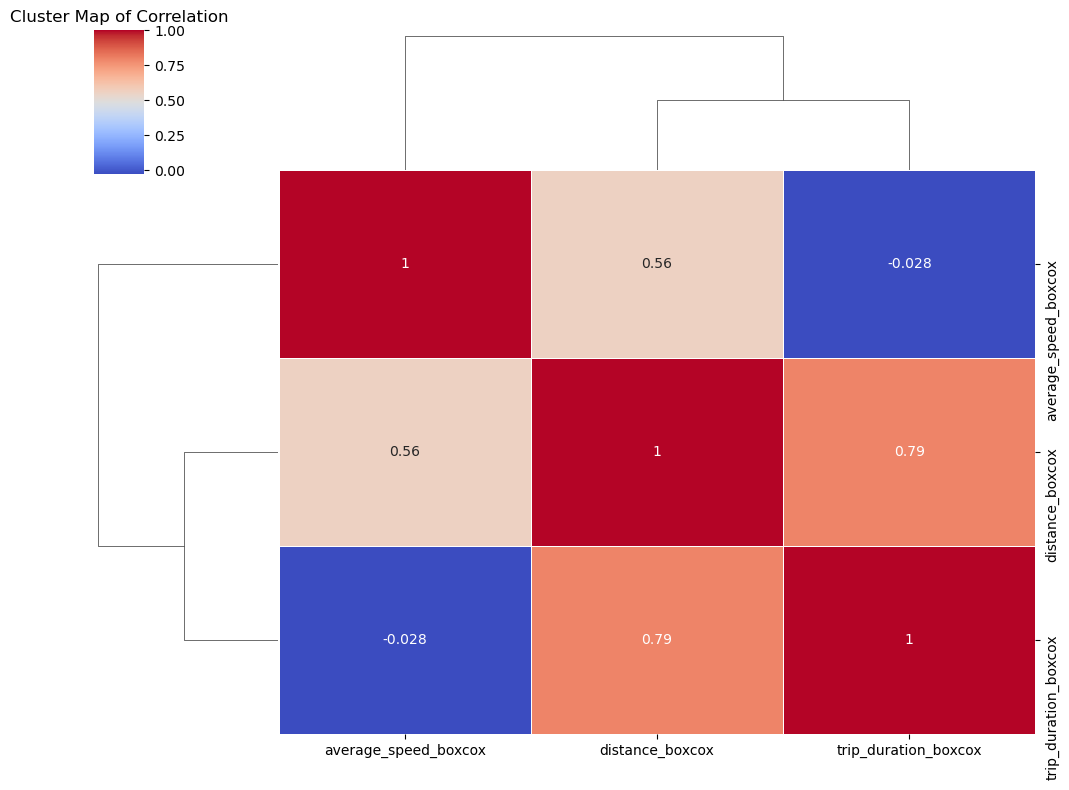

In [130]:
# selected_features is a list of features you want to include in the cluster map
selected_features = ['distance_boxcox', 'trip_duration_boxcox', 'average_speed_boxcox']

# Create a subset of the DataFrame with selected features
subset_df = df[selected_features]

# Create a cluster map
sns.clustermap(subset_df.corr(), cmap='coolwarm', annot=True, linewidths=.5, figsize=(10, 8))
plt.title('Cluster Map of Correlation')
plt.show()

- Trip duration and distance corelate to each other to a grater extent
- we can also note avg speed and distance are also co maped

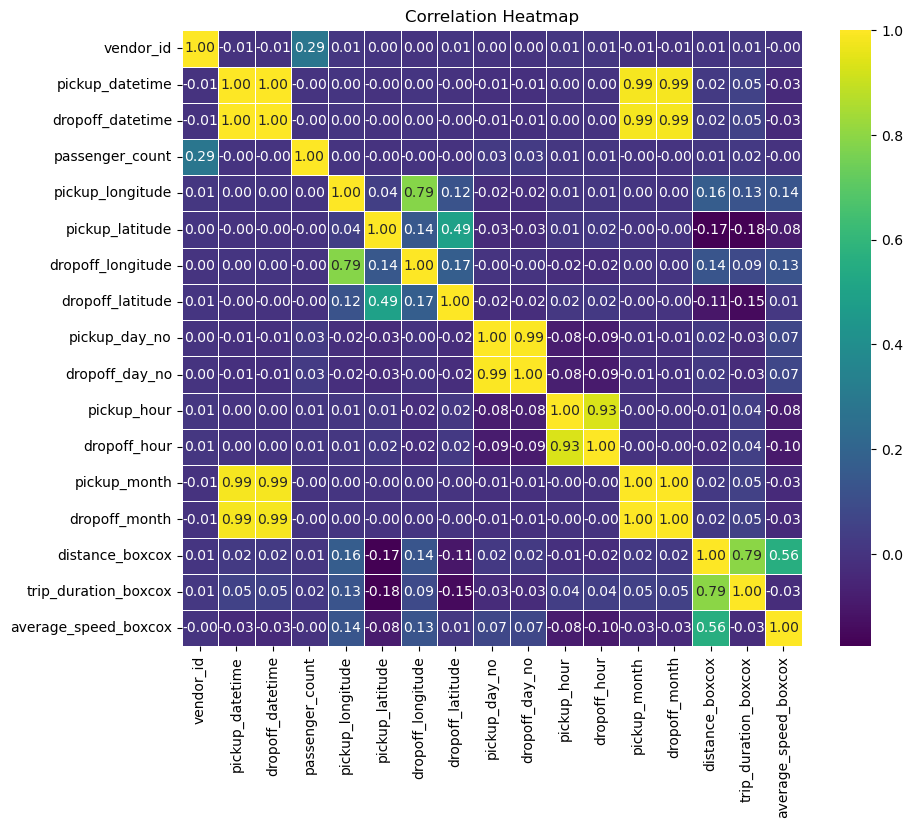

In [131]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Note:
- pickup_longitude is in good corelation with dropoff_longitude (we can drop dropoff_longitude feature)
- pickup_day_no is in good corelation with dropoff_day_no (we can drop dropoff_day_no feature)
- pickup_hour is in good corelation with dropoff_hour (we can drop dropoff_hour feature)
- pickup_month is in good corelation with dropoff_month (we can drop dropoff_month feature)

